## <a id="problem_statement"><b>LAB5 Problem Statement</a></b>
# Lab5 - Lab Assignment Five: Wide and Deep Network Architectures - Problem Statement

## Available: Oct 25, 2023 11:59pm

## Due Date: Nov 13, 2023 at 11:59 PM

### Data Scientist
- [Ben Brock](benbroc@gmail.com.com=project)
- [Cameron Jonathan Ervin](cjervin@smu.edu=project)
- [Jonathan Daniel Hunnicutt](jdhunnicutt@smu.edu=project)
- [MohammadAli Ezzati](ez@smu.edu=project)

### <a href="#TOC">TOP</a>

In this lab, you will select a prediction task to perform on your dataset, evaluate two different deep learning architectures and tune hyper-parameters for each architecture. If any part of the assignment is not clear, ask the instructor to clarify. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

### Dataset Selection
Select a dataset similarly to lab one. That is, the dataset must be table data. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression.

        
### Best Practices for Notebook: 
 - The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
 - The notebook should be run from start to finish in a sequential manner before submission.
 - It is preferable to remove all warnings and errors before submission.
 - The notebook should be submitted as an HTML file (.html)
    
### Submisssion Guidelines

1. The submission should be a well-commented notebook [format - .html]
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks.
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation.
4. Submission will not be evaluated if
   1. it is submitted post-deadline, or,
   2. more than 1 file is submitted.
    
### <a href="#TOC">TOP</a>
    
### <a href="#problem_statement">Lab5 : Problem Statement</a>

## <a id="detailed_grading_rubric">**Lab5 Detailed Grading Rubric**</a>

## **Grading Rubric**
- **Preparation (4.0 points total)**
  - <b>[1.0 points]</b> Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 
  - <b>[1.0 points]</b> Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 
  - <b>[1.0 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a <b>detailed argument for why this (these) metric(s) are appropriate</b> on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.
  - <b>[1.0 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice.  
<p>
<p>

- **Modeling (5.0 points total)**
  - <b>[2.0 points]</b> Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data. 
  - <b>[2.0 points]</b> Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.   
  - <b>[1.0 points]</b> Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network).  
<p>
<p>

- **Exceptional Work (1 points total)**
    - <b>(0.4)</b> The overall quality of the report as a coherent, useful, complete and polished product will be reflected here. Did you support your reasons for creating cross categories? Did you include plots and provide interpretation? Did you justify your choice of metrics?
    - <b>(0.6) Additional analysis</b>
  - 5000 level student: You have free reign to provide additional analyses and visualizations appropriate to your data.  Implement additional optimization models or statistical analysis.
  - <b>(7000 level students</b>): 
      - Capture the embedding weights from the deep network and **(if needed)** perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.
     - Use **statistical methods** to compare the performance of different models.  For classification tasks, you ight compare using the receiver operating characteristic and area under the curve. For regression tasks, you might use use Bland-Altman plots and residual variance calculations.
    

## Sample Notebooks
- https://www.kaggle.com/code/yaseminturker/ml-models-for-income-estimation

### <a href="#TOC">TOP</a>
    
### <a href="#problem_statement">LAB5 : Problem Statement</a>

### Custom Function to Determine Mean, Median, Mode, Skew, and IQR for Input Distribution
Created custom python code to determine the mean, median, mode, skew, and IDQ for a sample distribution. This was used to determine if a distribution was left skewed, right skewed, or normal.

### Skewed Distribution Test

1. Symmetrical: mean = median = mode
2. Positive (right) skew: mean > median > mode
3. Negative (left) skew: mean < median < mode 

In [1]:
import scipy.stats as stats
from scipy.stats import iqr
import numpy as np

def custom_stats_information(value, df):
    
    '''
    custom_stats_information Helper Function
    
    parameter1 : value - DataFrame column name 
    parameter2 : df - DataFrame name
    
    Will print a summary of the following list of values below:
    - min
    - max
    - mean
    - median
    - std
    - mode
    - skew
    - IQR = Q3 - Q1
    - lower_outlier_gate_water_mark
    - upper_outlier_gate_water_mark
    - Q1 - 25%
    - Q2 - 50%  ==> median
    - Q3 - 75%
    
    **Summary of Skewness**
    - mean = median = mode --> symmetric
    - mean > median > mode --> positive skewed RIGHT
    - mean < median < mode --> negative skewed LEFT
    '''
    mode = list(df[value].mode())
    num_items_in_list = len(mode)
    
    q3 = np.quantile(df[value], 0.75)
    q1 = np.quantile(df[value], 0.25)
    q2_50 = np.quantile(df[value], 0.50)
    
    iqr = q3 - q1
    
    # Q3 + 1.5 * IQR: upper outlier gate
    upper_outlier_water_mark_whisker = q3 + 1.5*iqr
    
    # Q1 - 1.5 * IQR: lower outlier gate
    lower_outlier_water_mark_whisker = q1 - 1.5*iqr
    
    if num_items_in_list == 1:
        print('{} has mode value: {}'.format(value, mode[0]))
    else:
        print('{} has multi-mode value: {}'.format(value, num_items_in_list))
        
        
    print("{} min value is {:.2f}\n"
       "{} max value is {:.2f}\n"
       "{} mean value is {:.2f}\n"
       "{} median value is {:.2f}\n"
       "{} std value is {:.2f}\n"
       "{} mode value is {:.2f}  mode items {}\n"
       "{} skew value is {:.2f}\n"
       "{} IQR value is {:.2f}\n"
       "{} Lower outlier gate value is {:.2f}\n"
       "{} Outer outlier gate value is {:.2f}\n"
       "{} Q1_25 value is {:.2f}\n"
       "{} Q_50 value is {:.2f}\n"
       "{} Q3_75 value is {:.2f}".format(value,
                                    df[value].min(),
                                    value,
                                    df[value].max(),
                                    value, 
                                    df[value].mean(),
                                    value,
                                    df[value].median(),
                                    value,
                                    df[value].std(),
                                    value,
                                    num_items_in_list, mode,
                                    value,
                                    df[value].skew(),
                                    value,
                                    iqr,
                                    value,
                                    lower_outlier_water_mark_whisker,
                                    value,
                                    upper_outlier_water_mark_whisker,
                                    value,
                                    q1,
                                    value,
                                    q2_50,
                                    value,
                                    q3))

In [2]:
# function to plot a boxplot and a histogram along the same scale.

"""
Code re-used from the Great Learning Data Science bootcamp
This sort_values_labeled_barplot is such a useful, I decided to 
keep in with my list of Data Science Data Visualization toolkit.
"""

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    
    Author:  Great Learning Data Science
    Date:    1/2022
    
    input parameters
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    
    return:
    None
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def show_distribution(data):
    """
    Show distribution skew value, histogram, and boxplot for each selected feature.
    Here, you will be able to easily view the skew value, histogram, and boxplot 
    for each feature distribution. This helps out with obtaining a quick
    distribution interpretation.
    
    The Python libraries used seaborn sns, matplotlib, and the pandas DataFrame.
    The above libraries are very easy to use in an object-oriented way to get to
    appropriate functionality.
    
    It is assumed that the data columns are ONLY for continuous features
    
    Author:  Ben Brock
    Date:    1/2022
    
    input parameters
    data : cleaned pandas DataFrame that contains only continuous features/values
    
    return:
    None
    """
    for col in data.columns[0:]:
        print(col)

        print('Skew :', round(data[col].skew(), 2))

        plt.figure(figsize = (10, 0.5))
        plt.subplot(1, 2, 1)
        data[col].hist(bins = 10, grid = False)

        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x = data[col])
        plt.show()

In [4]:
# function to create labeled barplots with sorted values

"""
Code re-used from the Great Learning Data Science bootcamp
This sort_values_labeled_barplot is such a useful, I decided to 
keep in with my list of Data Science Data Visualization toolkit.
"""

def sort_values_labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top of each value going but with the ordering
    from high to low

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    
    Author:  Great Learning Data Science
    Date:    1/2022
    
    input 
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    
    return:
    None
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def sort_values_labeled_barplot_top_values(data, feature, perc=False, n=10):  # Set the default value of n to 10
    """
    Barplot with percentage at the top of each value, sorted from high to low.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is 10)
    
    Author: Great Learning Data Science
    Date: 1/2022
    
    input 
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is 10)
    
    return:
    None
    """

    total = len(data[feature])  # length of the column
    plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    
    # Sort the data based on the value counts and select the top n values
    ordered_data = data[feature].value_counts().index[:n]
    
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=ordered_data)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    
    plt.show()

# Example usage:
# sort_values_labeled_barplot(your_data, "your_feature")


In [6]:
# Function to remove accented characters
def remove_accented_chars(text):
    import unicodedata
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Function to remove special characters
def remove_special_characters(text, remove_digits=False):
    import re
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [7]:
# Function to clean player_value and convert to numerical format
def clean_player_value(value):
    # Remove "$" and ',' symbols and convert to integer
    value = int(value.replace('$', '').replace('.', '').replace(',', ''))
    return value

In [8]:
# Function to clean and convert player_value
def clean_and_convert_player_value(value):
    # Remove "$" and ',' symbols and convert to integer
    value = int(value.replace('$', '').replace('.', '').replace(',', ''))
    return value

In [9]:
import pandas as pd

"""
Example Legal names:

Example 1:
cristian castro devenish  # full 1st name, full middle name, full last name
michel ange balikwisha

Example 2:
silaldo taffarel  # full 1st name, and full last name

Example 3:
neymar jr           # full 1st name, and full last name
cristiano ronaldo   # full 1st name, and full last name

Example 4:
cote                # one name only


if len(name_parts) == 1:
    # No need to normalize if there's only one name
    return name
elif len(name_parts) == 2:
    # Keep 1st initial of the 1st name and the last name
    return f"{name_parts[0][0]} {name_parts[-1]}"
else:
    # Keep the full 1st name and the last name
    return f"{name_parts[0]} {name_parts[-1]"
"""

def normalize_player_name(name):
    name_parts = name.split()
    
    if len(name_parts) == 1:
        # No need to normalize if there's only one name
        return name
    elif len(name_parts) == 2:
        # Keep 1st initial of the 1st name and the last name
        return f"{name_parts[0][0]} {name_parts[-1]}"
    else:
        # Keep the full 1st name and the last name
        return f"{name_parts[0]} {name_parts[-1]}"

In [10]:
import pandas as pd

def report_corr(df, threshold=.001):
    """
    report_corr : report correlations
    
    Let the user easily print the correlation values of two continuous variable pairs.
    Will only print the values if they are higher than a user defined threshold. 
    
    It is assumed that the data columns are ONLY for continuous features
    
    Author:  Ben Brock
    Date:    1/2022
    
    input parameters
    df : cleaned pandas DataFrame that contains only continuous features/values
    threshold: user-defined value between 0.00 to 1.00
    
    return:
    None
    """
    
    assert (threshold<=1 and threshold > 0), "Threshold is invalid.  The valid range is between 0 and 1."
    
    # create the correlation matrix
    corr_mat = df.corr()
    sol = (corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
                      .stack()
                      .sort_values(ascending=False))

    #print correlation for the continuous variable pairs if the threshold is above the user defined value
    for index, value in sol.items():
        if abs(value) >= threshold:
            print('%1.2f: %s vs %s' %(value, index[0], index[1]))

In [11]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### <a href="#TOC">TOP</a>

### <a href="#problem_statement">Project 5 : Problem Statement</a>

<a id="TOC"></a>
# Table of Contents

## Scoring guide (Rubric) -  Lab Assignment Five: Wide and Deep Network Architectures

## <a href="#understand_structure_of_data">1 - Preparation</a>
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Understanding the structure of the data (<b>4 points total</b>)</h3>
    <ul>
        <li> <b>[1.0 points]</b> Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).</li>
        <li> <b>[1.0 points]</b> Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or <b>[1.0 points]</b> That is, why some features should not be crossed).</li>
        <li> <b>[1.0 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a <b>detailed argument for why this (these) metric(s) are appropriate</b> on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.</li>
        <li> <b>[1.0 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice.</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

## <a href="#univariate_data_analysis">2 - Modeling</a>
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Deep Learning Modeling Setup(<b>5 points total</b>)</h3>
    <ul>
        <li><b>[2.0 points]</b> Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data. </li>
        <li> <b>[2.0 points]</b> Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.</li>
        <li><b>[1.0 points]</b> Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network).</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

## <a href="#multivariate_data_analysis">3 - Exceptional Work</a> 
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Exceptional Work(<b>1.0 points total</b>)</h3>
    <ul>
        <li><b>(0.4)</b> The overall quality of the report as a coherent, useful, complete and polished product will be reflected here. Did you support your reasons for creating cross categories? Did you include plots and provide interpretation? Did you justify your choice of metrics?</li>
        <li><b>(0.6) Additional analysis</b></li>
        <li><b>5000 level student:</b> You have free reign to provide additional analyses and visualizations appropriate to your data.  Implement additional optimization models or statistical analysis.</li>
        <li><b>(7000 level students</b>):
        <li>Capture the embedding weights from the deep network and <b>(if needed)</b> perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data. </li>
        <li>Use <b>statistical methods</b> to compare the performance of different models.  For classification tasks, you might compare using the receiver operating characteristic and area under the curve. For regression tasks, you might use use Bland-Altman plots and residual variance calculations.</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

## <a href="#quality_use_of_visualizations">Exploratory Data Analyis (EDA)</a>
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Detailed EDA</h3>
    <ul>
        <li>Continuous Features.</li>
        <li>Categorical Features</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

## <a href="#conclusion_and_key_takeaways">5 - Conclusion and Recommendations</a>

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Conclusion and Recommendations</h3>
    <ul>
        <li>Conclude with the key insights/observations</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

<a id="notebook_overall"></a>
## 6 - Well Commented Python Code
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Well Commented Python Code (<b>4 points total</b>)</h3>
    <ul>
        <li>Structure and flow</li>
        <li>Well commented code</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

<a id="understand_structure_of_data"></a>
## Understanding the structure of the data - Grading Rubric

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Understanding the structure of the data (<b>2 points total</b>)</h3>
    <ul>
        <li>Overview of the dataset shape, datatypes</li>
        <li>Statistical summary, shape</li>
        <li>check for missing values</li>
    </ul>
</div>

### <a href="#TOC">TOP</a>

## Load and overview the dataset

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

Loading the data into python to explore and understand it.

- You MUST address
  - **Reference "Understanding the structure of the data" item requirements listed in the grading rubric to earn the maximum score**
  - overview of the dataset shape and datatypes
  - statistical summary and shape
  - check for missing values

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder)

from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold,
                                     cross_val_score)

from sklearn.preprocessing import LabelEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

## Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

## Anaconda IDE Python Virtual Environment

In [15]:
import os; 
print(os.environ["CONDA_DEFAULT_ENV"])

cnn_env


In [16]:
!pip install missingno

## 1. Load the data into memory and save it to a pandas data frame


In [17]:
# Load the Dataset
fifa24_df = pd.read_csv('data\\player_stats.csv', encoding="ISO-8859-1")
dfa = fifa24_df.copy()

In [18]:
# Load the Dataset
fifa23_df = pd.read_csv('data\\CLEAN_FIFA23_official_data.csv')
df = fifa23_df.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17660 non-null  int64  
 1   ID                        17660 non-null  int64  
 2   Name                      17660 non-null  object 
 3   Age                       17660 non-null  int64  
 4   Photo                     17660 non-null  object 
 5   Nationality               17660 non-null  object 
 6   Flag                      17660 non-null  object 
 7   Overall                   17660 non-null  int64  
 8   Potential                 17660 non-null  int64  
 9   Club                      17660 non-null  object 
 10  Club Logo                 17660 non-null  object 
 11  Value(£)                  17660 non-null  float64
 12  Wage(£)                   17660 non-null  float64
 13  Special                   17660 non-null  int64  
 14  Prefer

## Observation

From the information provided, it does appear that there are no missing values in your DataFrame, as indicated by the "Non-Null Count" values for all features being equal to the total number of entries (5682). This suggests that the dataset has been pre-processed to either fill in missing values or that it was collected in a way that ensures there are no missing data points in the initial dataset.

Here are a few additional points to consider:

1. Data Types: It's important to note the data types of the columns. In your DataFrame, most columns have a data type of `int64`, while some are of type `object`. You may want to investigate the "value" column, which is of type `object`, to determine its contents and whether it needs to be converted to a numeric type (e.g., for monetary values).

2. Data Quality: Even though there are no missing values, it's still essential to check for data quality issues such as outliers, incorrect data, or inconsistencies. You should perform exploratory data analysis (EDA) to ensure the data is accurate and meaningful.

3. Domain Knowledge: Understanding the domain of your data is crucial. You should be aware of what each column represents and whether it aligns with your analysis goals. For example, it's essential to know what "value" represents and how it should be interpreted.

4. Feature Engineering: Depending on your analysis goals, you may need to perform feature engineering or transformation of variables. This can involve creating new features, scaling, or encoding categorical variables.

In summary, while the absence of missing values is a positive sign, further data exploration and preprocessing may still be necessary to prepare the dataset for your specific analysis or modeling objectives. Additionally, consider verifying the quality and accuracy of the data, and ensure that the data types are appropriate for the intended analysis.


From the information provided, it does appear that there are no missing values in your DataFrame, as indicated by the "Non-Null Count" values for all features being equal to the total number of entries (5682). This suggests that the dataset has been pre-processed to either fill in missing values or that it was collected in a way that ensures there are no missing data points in the initial dataset.

Here are a few additional points to consider:

1. Data Types: It's important to note the data types of the columns. In your DataFrame, most columns have a data type of `int64`, while some are of type `object`. You may want to investigate the "value" column, which is of type `object`, to determine its contents and whether it needs to be converted to a numeric type (e.g., for monetary values).

2. Data Quality: Even though there are no missing values, it's still essential to check for data quality issues such as outliers, incorrect data, or inconsistencies. You should perform exploratory data analysis (EDA) to ensure the data is accurate and meaningful.

3. Domain Knowledge: Understanding the domain of your data is crucial. You should be aware of what each column represents and whether it aligns with your analysis goals. For example, it's essential to know what "value" represents and how it should be interpreted.

4. Feature Engineering: Depending on your analysis goals, you may need to perform feature engineering or transformation of variables. This can involve creating new features, scaling, or encoding categorical variables.

In summary, while the absence of missing values is a positive sign, further data exploration and preprocessing may still be necessary to prepare the dataset for your specific analysis or modeling objectives. Additionally, consider verifying the quality and accuracy of the data, and ensure that the data types are appropriate for the intended analysis.

In [20]:
df.shape

(17660, 31)

## Observation
- 17660 rows and 31 columns

In [21]:
df.columns = df.columns.str.lower()

In [22]:
df.columns

Index(['unnamed: 0', 'id', 'name', 'age', 'photo', 'nationality', 'flag',
       'overall', 'potential', 'club', 'club logo', 'value(£)', 'wage(£)',
       'special', 'preferred foot', 'international reputation', 'weak foot',
       'skill moves', 'work rate', 'body type', 'real face', 'position',
       'joined', 'loaned from', 'contract valid until', 'height(cm.)',
       'weight(lbs.)', 'release clause(£)', 'kit number',
       'best overall rating', 'year_joined'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed: 0                17660 non-null  int64  
 1   id                        17660 non-null  int64  
 2   name                      17660 non-null  object 
 3   age                       17660 non-null  int64  
 4   photo                     17660 non-null  object 
 5   nationality               17660 non-null  object 
 6   flag                      17660 non-null  object 
 7   overall                   17660 non-null  int64  
 8   potential                 17660 non-null  int64  
 9   club                      17660 non-null  object 
 10  club logo                 17660 non-null  object 
 11  value(£)                  17660 non-null  float64
 12  wage(£)                   17660 non-null  float64
 13  special                   17660 non-null  int64  
 14  prefer

In [24]:
df.isnull().sum()

unnamed: 0                   0
id                           0
name                         0
age                          0
photo                        0
nationality                  0
flag                         0
overall                      0
potential                    0
club                         0
club logo                    0
value(£)                     0
wage(£)                      0
special                      0
preferred foot               0
international reputation     0
weak foot                    0
skill moves                  0
work rate                    0
body type                   38
real face                    0
position                     0
joined                       0
loaned from                  0
contract valid until         0
height(cm.)                  0
weight(lbs.)                 0
release clause(£)            0
kit number                   0
best overall rating          0
year_joined                  0
dtype: int64

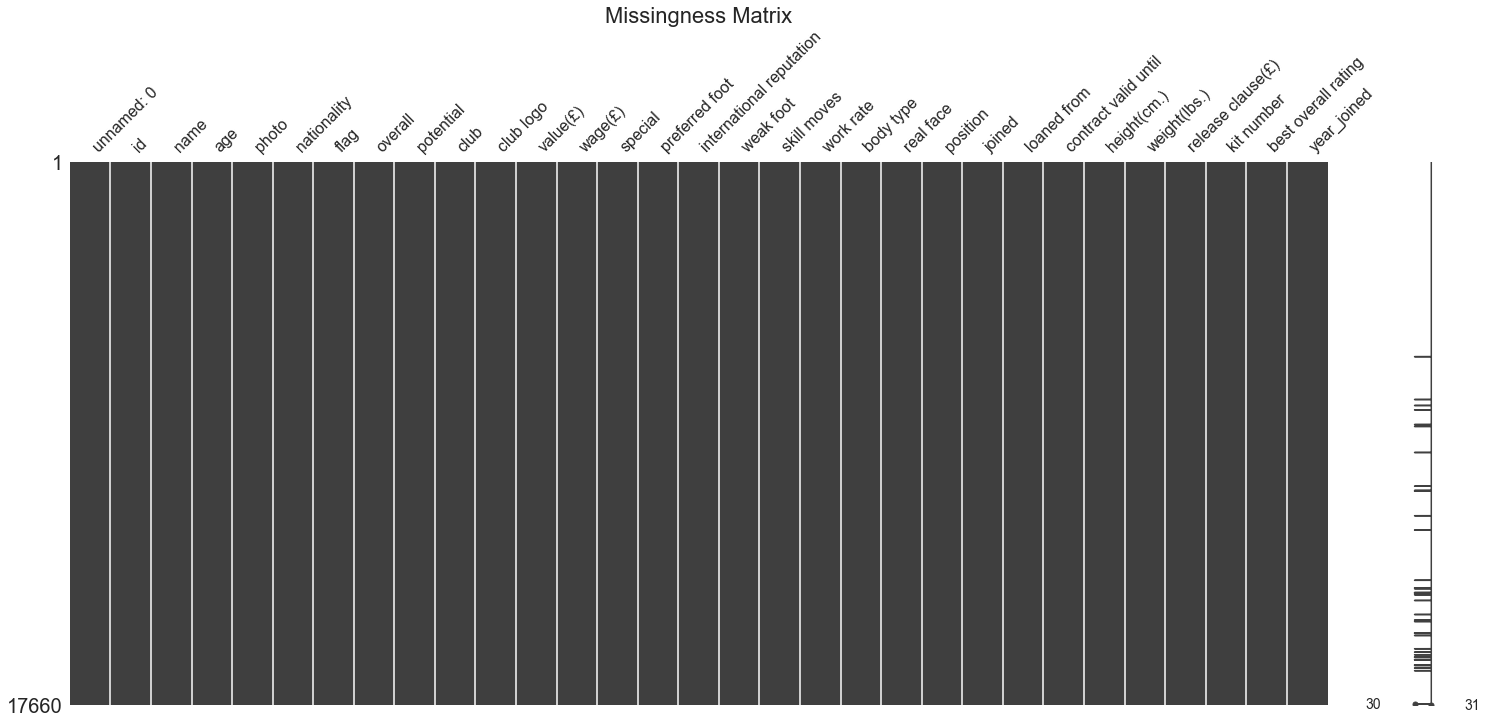

<Figure size 432x288 with 0 Axes>

In [25]:
import missingno as msno
msno.matrix(df)
plt.title("Missingness Matrix", fontsize=22)
plt.figure()
plt.show()

## Remove any observations that having missing data

In [26]:
#Let's drop the rows containing NaN
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

unnamed: 0                  0
id                          0
name                        0
age                         0
photo                       0
nationality                 0
flag                        0
overall                     0
potential                   0
club                        0
club logo                   0
value(£)                    0
wage(£)                     0
special                     0
preferred foot              0
international reputation    0
weak foot                   0
skill moves                 0
work rate                   0
body type                   0
real face                   0
position                    0
joined                      0
loaned from                 0
contract valid until        0
height(cm.)                 0
weight(lbs.)                0
release clause(£)           0
kit number                  0
best overall rating         0
year_joined                 0
dtype: int64

## Drop Features That Carry No Predictive Capability

In [28]:
df.drop(columns=["unnamed: 0", "photo", "flag", "club logo", "real face", 
                 "loaned from", "release clause(£)", "kit number", "id", 'contract valid until'], inplace=True)

## Obseration
- dropped columns
  - 'unnamed: 0', 
  - 'id'
  - 'photo'
  - 'flag'
  - 'club logo'
  - 'real face'
  - "loaned from", 
  - "release clause(£)", 
  - "kit number", 
  - 'contract valid until'

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17659
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17622 non-null  object 
 1   age                       17622 non-null  int64  
 2   nationality               17622 non-null  object 
 3   overall                   17622 non-null  int64  
 4   potential                 17622 non-null  int64  
 5   club                      17622 non-null  object 
 6   value(£)                  17622 non-null  float64
 7   wage(£)                   17622 non-null  float64
 8   special                   17622 non-null  int64  
 9   preferred foot            17622 non-null  object 
 10  international reputation  17622 non-null  float64
 11  weak foot                 17622 non-null  float64
 12  skill moves               17622 non-null  float64
 13  work rate                 17622 non-null  object 
 14  body t

## Look at the 1st 5 Columns

In [30]:
df.head()

,name,age,nationality,overall,potential,club,value(£),wage(£),special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,height(cm.),weight(lbs.),best overall rating,year_joined
0,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.000,115000.000,2312,Right,4.000,4.000,3.000,High/ Medium,Unique,SUB,2018-07-01,189.000,180.810,0.000,2018
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.000,190000.000,2305,Right,3.000,3.000,4.000,High/ High,Unique,LCM,2020-01-30,179.000,152.145,0.000,2020
2,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.000,46000.000,2303,Left,2.000,3.000,3.000,High/ High,Stocky (170-185),LB,2020-09-14,172.000,152.145,0.000,2020
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.000,350000.000,2303,Right,4.000,5.000,4.000,High/ High,Unique,RCM,2015-08-30,181.000,154.350,0.000,2015
4,N. Barella,25,Italy,86,89,Inter,89500000.000,110000.000,2296,Right,3.000,3.000,3.000,High/ High,Normal (170-),RCM,2020-09-01,172.000,149.940,0.000,2020


## Look at Last 5 Columns

In [31]:
df.tail()

,name,age,nationality,overall,potential,club,value(£),wage(£),special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,height(cm.),weight(lbs.),best overall rating,year_joined
17655,Deng Xiongtao,19,China PR,48,61,Meizhou Hakka,100000.000,500.000,762,Right,1.000,3.000,1.000,Medium/ Medium,Normal (185+),RES,2022-04-11,190.000,171.990,0.000,2022
17656,22 Lim Jun Sub,17,Korea Republic,48,64,Jeju United FC,100000.000,500.000,761,Right,1.000,2.000,1.000,Medium/ Medium,Lean (185+),RES,2022-01-01,195.000,185.220,0.000,2022
17657,A. Demir,25,Turkey,51,56,Ümraniyespor,70000.000,2000.000,759,Right,1.000,2.000,1.000,Medium/ Medium,Lean (185+),RES,2021-06-06,190.000,180.810,0.000,2021
17658,21 S. Czajor,18,Poland,50,65,Fleetwood Town,90000.000,500.000,758,Right,1.000,2.000,1.000,Medium/ Medium,Normal (185+),RES,2020-01-01,187.000,174.195,0.000,2020
17659,21 F. Jakobsson,20,Sweden,50,61,IFK Norrköping,90000.000,500.000,749,Left,1.000,2.000,1.000,Medium/ Medium,Normal (185+),RES,2020-01-08,186.000,171.990,0.000,2020


## Data Quality

In [32]:
# Checking the number of unique values in each column
df.nunique()

name                        17102
age                            31
nationality                   161
overall                        48
potential                      49
club                          918
value(£)                      258
wage(£)                       135
special                      1427
preferred foot                  2
international reputation        5
weak foot                       5
skill moves                     5
work rate                      10
body type                      10
position                       29
joined                       1855
height(cm.)                    51
weight(lbs.)                   57
best overall rating            12
year_joined                    28
dtype: int64

## Observation
- All features can be used for predictive analytics

## Check for Missing Values

In [33]:
df.isnull().sum()

name                        0
age                         0
nationality                 0
overall                     0
potential                   0
club                        0
value(£)                    0
wage(£)                     0
special                     0
preferred foot              0
international reputation    0
weak foot                   0
skill moves                 0
work rate                   0
body type                   0
position                    0
joined                      0
height(cm.)                 0
weight(lbs.)                0
best overall rating         0
year_joined                 0
dtype: int64

## Observation
- no missing values

## <b>Check duplicate entries</b>

In [34]:
df[df.duplicated()]

,name,age,nationality,overall,potential,club,value(£),wage(£),special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,height(cm.),weight(lbs.),best overall rating,year_joined


In [35]:
# checking for duplicate values in the data
df.duplicated().sum()

0

## Observation
- There are no duplicate rows in the dataset

## Data Design Model Overview

Things that motivated the Data Science during the LAB investigation

* Player Performance Analysis: Evaluate the performance of football players based on their attributes.
* Club Analysis: Investigate clubs, player distribution, and club statistics.
* Positional Insights: Explore the attributes specific to player positions.
* Player Valuation Trends: Analyze how player values change over time.
* Data Visualization:Create visualizations for better data representation.
* Machine Learning Models: Develop predictive models for various football-related forecasts.

Before using the dataset for analysis, it's advisable to preprocess the data, such as converting the "value" column into a numerical format, handling missing values, and ensuring consistency in column names. This dataset is a valuable resource for gaining insights into football, both in the context of the FIFA video game and real-world football.

## Continuous Variables/Features

In [36]:
continuous_features = list(df.describe(include=["int64", "float64"]).columns)
continuous_features

['age',
 'overall',
 'potential',
 'value(£)',
 'wage(£)',
 'special',
 'international reputation',
 'weak foot',
 'skill moves',
 'height(cm.)',
 'weight(lbs.)',
 'best overall rating',
 'year_joined']

In [37]:
len(continuous_features)

13

## Observation
- There are a total of 13 continuous features
- These continuous features are measurements of way that Data Analytics can be used measure the qualities of a soccer (aka football) player.

## Categorical Features

In [38]:
categorical_features = list(df.describe(include=["object", "category"]).columns)
categorical_features

['name',
 'nationality',
 'club',
 'preferred foot',
 'work rate',
 'body type',
 'position',
 'joined']

In [39]:
len(categorical_features)

8

## Remove any observations that having missing data.

In [40]:
df.isnull().sum()

name                        0
age                         0
nationality                 0
overall                     0
potential                   0
club                        0
value(£)                    0
wage(£)                     0
special                     0
preferred foot              0
international reputation    0
weak foot                   0
skill moves                 0
work rate                   0
body type                   0
position                    0
joined                      0
height(cm.)                 0
weight(lbs.)                0
best overall rating         0
year_joined                 0
dtype: int64

## Observation
- No missing data

## <b>Data Preprocessing</b>

## Remove Accented Characters and Special Characters
- player 
- club

In [41]:
# Apply both cleaning functions to the same feature (e.g., "player" column)
df['name'] = df['name'].apply(remove_accented_chars)

# Set remove_digits to True if you want to remove digits as well
df['name'] = df['name'].apply(remove_special_characters, remove_digits=True)

In [42]:
# Apply both cleaning functions to the same feature (e.g., "club" column)
df['club'] = df['club'].apply(remove_accented_chars)

# Set remove_digits to True if you want to remove digits as well
df['club'] = df['club'].apply(remove_special_characters, remove_digits=False)  

In [43]:
## Process the FIFA23 DataFrame
df['name'] = df['name'].str.lower()
df['nationality'] = df['nationality'].str.lower()
df['club'] = df['club'].str.lower()
df['work rate'] = df['work rate'].str.lower()
df['preferred foot'] = df['preferred foot'].str.lower()
df['body type'] = df['body type'].str.lower()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17659
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17622 non-null  object 
 1   age                       17622 non-null  int64  
 2   nationality               17622 non-null  object 
 3   overall                   17622 non-null  int64  
 4   potential                 17622 non-null  int64  
 5   club                      17622 non-null  object 
 6   value(£)                  17622 non-null  float64
 7   wage(£)                   17622 non-null  float64
 8   special                   17622 non-null  int64  
 9   preferred foot            17622 non-null  object 
 10  international reputation  17622 non-null  float64
 11  weak foot                 17622 non-null  float64
 12  skill moves               17622 non-null  float64
 13  work rate                 17622 non-null  object 
 14  body t

In [45]:
df["weak foot"].value_counts()

3.000    10981
2.000     4086
4.000     2122
5.000      265
1.000      168
Name: weak foot, dtype: int64

<a id="back_to_eda"></a>

### The detailed FIFA-24 EDA section is listed here: <a href="#quality_use_of_visualizations">FIFA-24 Exploratory Data Analyis (EDA)</a>
### The detailed FIFA-23 EDA section is listed here: <a href="#quality_use_of_visualizations_fifa23">FIFA-23 Exploratory Data Analyis (EDA)</a>

In [46]:
df.head()

,name,age,nationality,overall,potential,club,value(£),wage(£),special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,height(cm.),weight(lbs.),best overall rating,year_joined
0,l goretzka,27,germany,87,88,fc bayern munchen,91000000.000,115000.000,2312,right,4.000,4.000,3.000,high/ medium,unique,SUB,2018-07-01,189.000,180.810,0.000,2018
1,bruno fernandes,27,portugal,86,87,manchester united,78500000.000,190000.000,2305,right,3.000,3.000,4.000,high/ high,unique,LCM,2020-01-30,179.000,152.145,0.000,2020
2,m acuna,30,argentina,85,85,sevilla fc,46500000.000,46000.000,2303,left,2.000,3.000,3.000,high/ high,stocky (170-185),LB,2020-09-14,172.000,152.145,0.000,2020
3,k de bruyne,31,belgium,91,91,manchester city,107500000.000,350000.000,2303,right,4.000,5.000,4.000,high/ high,unique,RCM,2015-08-30,181.000,154.350,0.000,2015
4,n barella,25,italy,86,89,inter,89500000.000,110000.000,2296,right,3.000,3.000,3.000,high/ high,normal (170-),RCM,2020-09-01,172.000,149.940,0.000,2020


In [47]:
df.tail()

,name,age,nationality,overall,potential,club,value(£),wage(£),special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,height(cm.),weight(lbs.),best overall rating,year_joined
17655,deng xiongtao,19,china pr,48,61,meizhou hakka,100000.000,500.000,762,right,1.000,3.000,1.000,medium/ medium,normal (185+),RES,2022-04-11,190.000,171.990,0.000,2022
17656,lim jun sub,17,korea republic,48,64,jeju united fc,100000.000,500.000,761,right,1.000,2.000,1.000,medium/ medium,lean (185+),RES,2022-01-01,195.000,185.220,0.000,2022
17657,a demir,25,turkey,51,56,umraniyespor,70000.000,2000.000,759,right,1.000,2.000,1.000,medium/ medium,lean (185+),RES,2021-06-06,190.000,180.810,0.000,2021
17658,s czajor,18,poland,50,65,fleetwood town,90000.000,500.000,758,right,1.000,2.000,1.000,medium/ medium,normal (185+),RES,2020-01-01,187.000,174.195,0.000,2020
17659,f jakobsson,20,sweden,50,61,ifk norrkoping,90000.000,500.000,749,left,1.000,2.000,1.000,medium/ medium,normal (185+),RES,2020-01-08,186.000,171.990,0.000,2020


## Feature Engineering

It's clear that the FIFA23 dataset has a significant number of continuous variables and only a few categorical variables. However, there are opportunities for feature engineering to create new categorical variables by binning some of the continuous features, like age. This can be a useful strategy to increase the number of categorical variables and potentially gain more insights from the data.

<b>"age_group"</b>

In [48]:
bins = [14, 20, 25, 30, 54]  # Define age ranges
labels = ["rookie", "young_talent", "established_player", "seasoned_veteran"]  # Labels for the categories
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_group'] = df['age_group'].astype('object')

<b>"special_group"</b>

In [49]:
# BINNING special_group
percentiles = [0, 33, 67, 100]
quart = np.percentile(df['special'], percentiles)
bins = quart
labels = ['low_special', 'average_special', 'high_special']
df['special_group'] = pd.cut(df['special'], bins=bins, labels=labels, include_lowest=True)
df['special_group'] = df['special_group'].astype('object')

<b>"wage(£)_group"</b>

In [50]:
quart = np.quantile(df['wage(£)'], q=[0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0])
bins = quart
labels = ['wage cat 0','wage cat 1','wage cat 2','wage cat 3','wage cat 4','wage cat 5','wage cat 6','wage cat 7']
df['wage(£)_group'] = pd.cut(df['wage(£)'], bins=bins, labels=labels, include_lowest=True)
df['wage(£)_group'] = df['wage(£)_group'].astype('object')

<b>"value(£)_group"</b>

In [51]:
# Corrected binning value(£)_group
bins = [-np.inf, 0, 325000, 700000, 1800000, np.inf]
labels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional']
df['value(£)_group'] = pd.cut(df['value(£)'], bins=bins, labels=labels, include_lowest=True, duplicates='drop')
df['value(£)_group'] = df['value(£)_group'].astype('object')

## <b>Drop Continuous Features That Were Used To Create Binning-Categorical Variables</b>

In [52]:
df.drop(columns=["age", "special", "value(£)", "wage(£)"], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17659
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17622 non-null  object 
 1   nationality               17622 non-null  object 
 2   overall                   17622 non-null  int64  
 3   potential                 17622 non-null  int64  
 4   club                      17622 non-null  object 
 5   preferred foot            17622 non-null  object 
 6   international reputation  17622 non-null  float64
 7   weak foot                 17622 non-null  float64
 8   skill moves               17622 non-null  float64
 9   work rate                 17622 non-null  object 
 10  body type                 17622 non-null  object 
 11  position                  17622 non-null  object 
 12  joined                    17622 non-null  object 
 13  height(cm.)               17622 non-null  float64
 14  weight

## <b>FIFA23 Final Features In Data Set</b>

In [54]:
#df["year_joined"] = df["year_joined"].astype('category') 

In [55]:
continuous_features = list(df.describe(include=["int64", "float64"]).columns)
continuous_features

['overall',
 'potential',
 'international reputation',
 'weak foot',
 'skill moves',
 'height(cm.)',
 'weight(lbs.)',
 'best overall rating',
 'year_joined']

In [56]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
overall,17622.000,63.356,8.029,44.000,58.000,63.000,69.000,91.000
potential,17622.000,70.973,6.522,47.000,67.000,71.000,75.000,95.000
international reputation,17622.000,1.104,0.402,1.000,1.000,1.000,1.000,5.000
weak foot,17622.000,2.900,0.664,1.000,3.000,3.000,3.000,5.000
skill moves,17622.000,2.300,0.753,1.000,2.000,2.000,3.000,5.000
height(cm.),17622.000,180.893,6.962,149.000,176.000,181.000,186.000,206.000
weight(lbs.),17622.000,163.879,15.391,105.840,154.350,163.170,174.195,242.550
best overall rating,17622.000,0.060,1.938,0.000,0.000,0.000,0.000,77.000
year_joined,17622.000,2020.225,2.040,1990.000,2020.000,2021.000,2022.000,2022.000


In [57]:
len(continuous_features)

9

In [58]:
categorical_features = list(df.describe(include=["object", "category"]).columns)
categorical_features

['name',
 'nationality',
 'club',
 'preferred foot',
 'work rate',
 'body type',
 'position',
 'joined',
 'age_group',
 'special_group',
 'wage(£)_group',
 'value(£)_group']

In [59]:
len(categorical_features)

12

## OBSERVATION

Continuous Features
- Based on the FIFA23 EDA, the Data Science team recommended that the following continuous variable is dropped from the dataset
  - "best overall rating"
      - Based on the FIFA23 EDA and information and statistics in the dataset, it appears that the "best overall rating" feature in the FIFA23 dataset is highly skewed, with the majority of values concentrated at 0. This suggests that most entries have a "best overall rating" of 0, with very few exceptions. Additionally, the feature has a mode of 0, meaning that this value occurs most frequently. Given that the data is highly imbalanced, with minimal variance in the "best overall rating" values, and the majority of values are concentrated at 0, it may not provide meaningful or useful information for your analysis or modeling. In this context, it seems that "best overall rating" wasn't utilized correctly or effectively in the dataset. Considering these factors, our team is considering disregarding this feature for our analysis, as it doesn't appear to provide valuable insights or discrimination between different data points. 
      
Categorical Features
 - "joined"
    - Recommend to drop the feature because the information duplicated or kept in the "year_joined" feature
 - "wage(£)_group"
    - Recommend to drop this feature because it is highly correlated/based on the "value(£)_group".

In [60]:
df.drop(columns=["best overall rating", "joined", "wage(£)_group"], inplace=True)

## <b>Final FIFA23 Dataset</b>
- Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [61]:
continuous_features = list(df.describe(include=["int64", "float64"]).columns)
continuous_features

['overall',
 'potential',
 'international reputation',
 'weak foot',
 'skill moves',
 'height(cm.)',
 'weight(lbs.)',
 'year_joined']

In [62]:
len(continuous_features)

8

In [63]:
categorical_features = list(df.describe(include=["object", "category"]).columns)
categorical_features

['name',
 'nationality',
 'club',
 'preferred foot',
 'work rate',
 'body type',
 'position',
 'age_group',
 'special_group',
 'value(£)_group']

In [64]:
len(categorical_features)

10

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17622 non-null  object 
 1   nationality               17622 non-null  object 
 2   overall                   17622 non-null  int64  
 3   potential                 17622 non-null  int64  
 4   club                      17622 non-null  object 
 5   preferred foot            17622 non-null  object 
 6   international reputation  17622 non-null  float64
 7   weak foot                 17622 non-null  float64
 8   skill moves               17622 non-null  float64
 9   work rate                 17622 non-null  object 
 10  body type                 17622 non-null  object 
 11  position                  17622 non-null  object 
 12  height(cm.)               17622 non-null  float64
 13  weight(lbs.)              17622 non-null  float64
 14  year_j

In [66]:
df[continuous_features].dtypes

overall                       int64
potential                     int64
international reputation    float64
weak foot                   float64
skill moves                 float64
height(cm.)                 float64
weight(lbs.)                float64
year_joined                   int64
dtype: object

In [67]:
df[categorical_features].dtypes

name              object
nationality       object
club              object
preferred foot    object
work rate         object
body type         object
position          object
age_group         object
special_group     object
value(£)_group    object
dtype: object

## Multivariate Data Analysis

In [68]:
continuous_features = list(df.describe(include=["int64", "float64"]).columns)

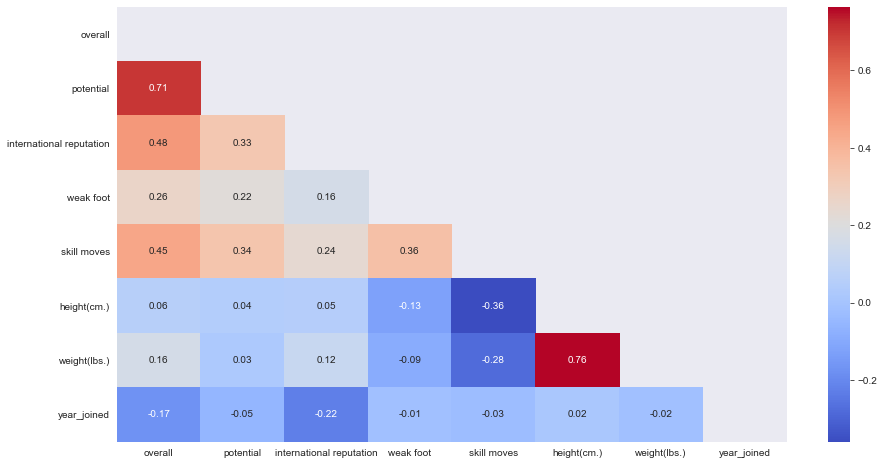

In [69]:
# Plotting Heatmap
plt.figure(figsize=(15,8))

corr = df[continuous_features].corr()

# creating mask
mask = np.triu(np.ones_like(corr))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(corr,
                       fmt=".2f",
                       cmap="coolwarm",
                       annot=True,
                       mask=mask);


In [70]:
report_corr(df[continuous_features],.90)

## Observation
- None of the variables seemed to be statistically correlated based on the heatmap

## Data Science Team Top Level Usecase

We have two options that we can use for the top level overall usecase:
 1. Predicting a player's market value or salary, your response variable could be the ‘Value’ column, respectively. 
 2. If the goal is to predict a player's position, the response variable could be the ‘Position’ column.
 
In our case, we have selected to predict a player's market value.  The response variable for the player's market value is named "value(£)_group" and the variable is categorical variable.

INDEPENDENT VARIABLEs
* all of the other features except "value(£)_group"

RESPONSE/TARGET VARIABLE
* "value(£)_group"

## <b>FINAL FIFA23 DataFrame</b>

## **Define and prepare your class variables**

In [71]:
df['years_played'] = 2023 - df['year_joined']
df = df.drop(['year_joined'], axis = 1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17622 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17622 non-null  object 
 1   nationality               17622 non-null  object 
 2   overall                   17622 non-null  int64  
 3   potential                 17622 non-null  int64  
 4   club                      17622 non-null  object 
 5   preferred foot            17622 non-null  object 
 6   international reputation  17622 non-null  float64
 7   weak foot                 17622 non-null  float64
 8   skill moves               17622 non-null  float64
 9   work rate                 17622 non-null  object 
 10  body type                 17622 non-null  object 
 11  position                  17622 non-null  object 
 12  height(cm.)               17622 non-null  float64
 13  weight(lbs.)              17622 non-null  float64
 14  age_gr

In [73]:
df.rename(columns={'preferred foot': 'preferred_foot',
                   'international reputation': 'international_reputation',
                    'weak foot': 'weak_foot',
                    'skill moves': 'skill_moves',
                    'work rate': 'work_rate',
                    'body type':'body_type'}, inplace=True)

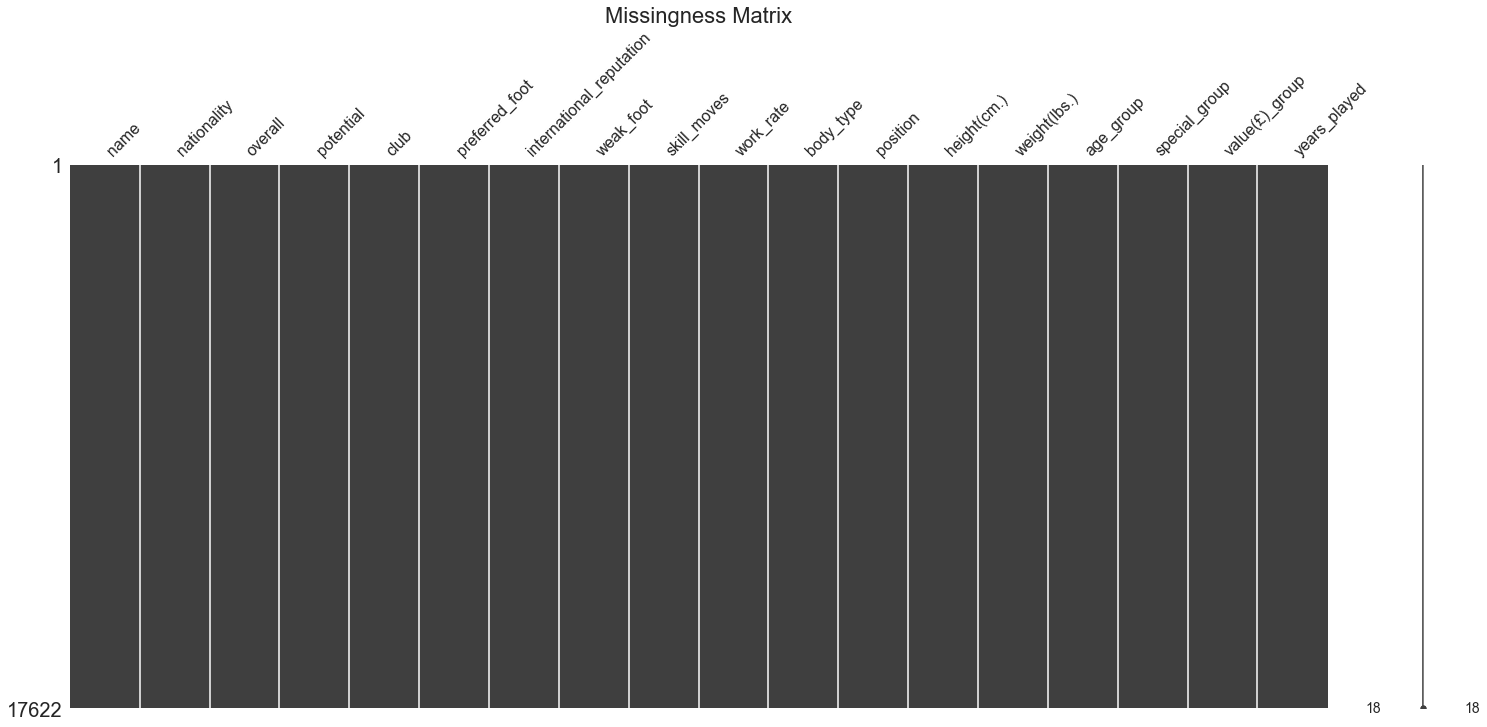

<Figure size 432x288 with 0 Axes>

In [74]:
import missingno as msno
msno.matrix(df)
plt.title("Missingness Matrix", fontsize=22)
plt.figure()
plt.show()

## <b>FIFA23 Data Dictionary</b>

|**Feature**|**Description**|**Data Type**|
|:-----|:--------|:----------|
| | ||
|**name**|The name of the football player. |string or object||
|**nationality**|The nationality or home country of the player.|string or object|
|**height(cm.)**|The height of the player in centimeters.|int64||
|**weight(lbs.)**|The weight of the player in pounds (lbs)|int64|
|**overall**|The "overall" rating is a summary or composite score that takes into account various attributes and skills of a player, such as shooting, passing, dribbling, defending, physical attributes like speed and strength, and more. A higher "overall" rating indicates a more skilled and impactful player, while a lower rating suggests a less skilled or less impactful player. |int64|
|**potential**|The "potential" rating is used to assess a player's growth and potential for improvement over time. A higher "potential" rating suggests that a player has a greater likelihood of developing into a top-tier player with increased skills and abilities as they progress in their career.|int64|
|**club**|The club to which the player is currently affiliated|string or object|
|**preferred footing**|Player's skill in controlling the ball. The term "preferred foot" refers to the dominant foot that a player primarily uses for kicking the ball. Players in soccer can be either right-footed or left-footed, meaning they favor using their right or left foot, respectively, for shooting, passing, and controlling the ball.|object|
|**international reputation**|The "international reputation" of players is typically rated on a 1 to 5 scale, with 5 being the best rating and 1 being the lowest. This rating system is often used in soccer video games like the FIFA series to assess a player's global status and marketability. Players with higher international reputation ratings tend to have a more significant impact on and off the field, making them attractive for clubs and sponsors.|object|
|**weak foot**|the term "weak foot" refers to a player's non-dominant foot, which is the foot they are less skilled at using for various soccer-related actions, such as shooting, passing, and dribbling. Most players have a dominant foot, which is typically their stronger and more accurate foot for performing these actions. The weak foot, also known as the non-dominant foot, is the opposite foot and is generally less precise and less powerful.|object/categorical|
|**skill moves**|the term "skill moves" refers to a player's ability to perform various technical and often flashy maneuvers with the ball. These moves are intended to outmaneuver opponents, create scoring opportunities, or simply showcase a player's exceptional ball-handling skills. Skill moves are typically characterized by their creativity, agility, and effectiveness in one-on-one situations.|object/categorical|
|**work rate**|"work rate" refers to the level of effort and energy a player puts into their performance on the field, particularly in terms of defensive and offensive contributions, as well as overall involvement in the game. A player's work rate is an important aspect of their playing style and can have a significant impact on the team's overall performance.  Work rate is often assessed based on a player's movement, running, tackling, pressing, and willingness to engage in both offensive and defensive actions. Players with a high work rate are typically known for their stamina, determination, and commitment to making positive contributions throughout the match.|object|
|**body type**|"body type" refers to the physical build or physique of a player. It provides a general description of a player's body composition and can influence their playing style, strengths, and attributes on the field. While body type is not an official or standardized metric in soccer, it is often used informally to describe certain characteristics of a player's physical appearance.  (1)Lean or Slender, (2) Athlectic or Muscular, (3) Stocky or Compact, or (4) Tall and Lanky|object|
|**position**|The "position" refers to the specific role or area of the field where a player operates during a match. Each position has its own set of responsibilities, both in attack and defense. The choice of positions depends on a player's skills, attributes, and playing style. (1) GK - Goalkeeper, (2) RB - Right Back, (3) LB - Left Back, (4)CB - Center Back (or CD - Center Defender), (5) RCB - Right Center Back, (6)LCB - Left Center Back, (7) CDM - Central Defensive Midfielder,  (8) CM - Central Midfielder, (9) ST - Striker (or CF - Center Forward), (10) SUB - Substitute, (11) RES - Reserve. |object|
|**year_played**| Number of years played by the soccer player/ It represents the year when the player officially became a part of that particular team. This information can be useful for tracking a player's career trajectory, understanding team dynamics, and analyzing the timing of transfers or acquisitions.|object/categorical|
|**age_group**|The age of player in grouped into the age appropriate group category. Choosing appropriate names for age bins in the FIFA23 dataset is essential for making the data more interpretable and relevant in the context of the soccer community. The names should reflect the career stages or experience levels of players. Here are suggested names for the age bins: (1) Rookie (15-20): Players in the early stages of their careers, often young and just starting to make their mark in professional soccer. (2) Young Talent (21-25): Players who have gained some experience but are still considered young talents with room for growth. (3) Established Player (26-30): Players who have established themselves in the sport and are typically in the prime of their careers. (4) Seasoned Veteran (31-54): Players with extensive experience, often seen as leaders in their teams, and nearing the later stages of their careers.  These names capture the general career progression and experience levels of soccer players and should be meaningful and recognizable in the soccer community. They can help in understanding the age distribution of players in the dataset and how it relates to their career stages|categorical/object|
|**special_group**|the "special" attribute appears to represent a numerical value associated with a player's special abilities or characteristics. The "special_group" is a categorical variable derived from binning the "special" values into different groups. In this case, the binning is done based on quantiles, dividing the data into three groups labeled as 'low_special,' 'average_special,' and 'high_special.' Special Group (Binned): (1) Low Special: Values up to the first quantile (25%). (2) Average Special: Values between the first and second quantiles (25% to 50%). (3) High Special: Values above the second quantile (50% and above) The binning is done to categorize players into groups based on their "special" attribute, providing a way to analyze and compare players with similar special characteristics.|category/object|
|**value(£)_group**|The "value(£)_group" in terms of soccer represents a categorization of players based on their estimated monetary value in British Pounds (£). This binning process is done to group players into different valuation categories, making it easier to analyze and compare players based on their perceived market worth. Value(£)_Group (Binned): **Moderately Low:** Values less than or equal to £0.00, **Low:** Values between £0.00 and £325,000.00, **Medium:** Values between £325,000.00 and £700,000.00, **High:** Values between £700,000.00 and £1,800,000.00, **Exceptional:** Values greater than £1,800,000.00. The binning helps categorize players into different groups based on their market value, providing insights into the distribution of player valuations within the dataset. Players in the "Exceptional" group may be those with no reported value, and the other groups represent increasing valuation tiers. |category/object|

## **Identify groups of features in your data that should be combined into cross-product features.**

## <a href="#multivariate_data_analysis">3 - Multivariate Data Analysis</a> 

<b>[1.0 points]</b> Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed).

In this FIFA23 dataset, we should not cross the following categorical variables
- name:  too many players in dataset. It is 17,622 players.  The visualization would be too busy/messy
- joined:  too many joined dates, visualization would be too busy/messy
- wage(£)_group: this is highly correlated with value(£)_group
- value(£)_group: no need to compare with itself.

Our hypothesis is that as the soccer ages, their critical skill levels will decrease overtime, thus thier total value as a player.

Here, we focused ONLY on the combination of the independent variables study.  

We have binned the continuous 'age' variable into a new feature named 'age_group' which break down the soccer player into progression time periods into their career.

These names capture the general career progression and experience levels of soccer players and should be meaningful and recognizable in the soccer community. They can help in understanding the age distribution of players in the dataset and how it relates to their career stages.

names "age_group": 
1. Rookie (15-20): Players in the early stages of their careers, often young and just starting to make their mark in professional soccer. 
2. Young Talent (21-25): Players who have gained some experience but are still considered young talents with room for growth. 
3. Established Player (26-30): Players who have established themselves in the sport and are typically in the prime of their careers. 
4. Seasoned Veteran (31-54): Players with extensive experience, often seen as leaders in their teams, and nearing the later stages of their careers.  


Areas that were cross-joined with 'age_group' are the following features:
 1. 'preferred_foot' 
     - Player's skill in controlling the ball. The term "preferred foot" refers to the dominant foot that a player primarily uses for kicking the ball. Players in soccer can be either right-footed or left-footed, meaning they favor using their right or left foot, respectively, for shooting, passing, and controlling the ball.
     - player's skill in controlling the ball may detoriate or change as the player ages in their career.
 2. 'work_rate'
     - "work_rate" refers to the level of effort and energy a player puts into their performance on the field, particularly in terms of defensive and offensive contributions, as well as overall involvement in the game. A player's work rate is an important aspect of their playing style and can have a significant impact on the team's overall performance.  Work rate is often assessed based on a player's movement, running, tackling, pressing, and willingness to engage in both offensive and defensive actions. Players with a high work rate are typically known for their stamina, determination, and commitment to making positive contributions throughout the match.
    - player's "work rate" may detoriate or change as the player ages in their career.
 3. 'body_type':
    - "body_type" refers to the physical build or physique of a player. It provides a general description of a player's body composition and can influence their playing style, strengths, and attributes on the field. While body type is not an official or standardized metric in soccer, it is often used informally to describe certain characteristics of a player's physical appearance.  (1)Lean or Slender, (2) Athlectic or Muscular, (3) Stocky or Compact, or (4) Tall and Lanky
    - player's "body_type" may detoriate or change as the player ages in their career.
 4. 'special_group'
    - the "special" attribute appears to represent a numerical value associated with a player's special abilities or characteristics. The "special_group" is a categorical variable derived from binning the "special" values into different groups. In this case, the binning is done based on quantiles, dividing the data into three groups labeled as 'low_special,' 'average_special,' and 'high_special.' Special Group (Binned): (1) Low Special: Values up to the first quantile (25%). (2) Average Special: Values between the first and second quantiles (25% to 50%). (3) High Special: Values above the second quantile (50% and above) The binning is done to categorize players into groups based on their "special" attribute, providing a way to analyze and compare players with similar special characteristics
    - player's "special_group" may detoriate or change as the player ages in their career.



## ID'd Which Features to Combine into Cross-Product Features

In [75]:
df_test = df.copy()

In [76]:
cross_columns = [['age_group', 'preferred_foot'],
                 ['age_group', 'work_rate'],
                 ['age_group', 'body_type'],
                 ['age_group', 'special_group']
                ]

cross_col_df_names = []
for cols_list in cross_columns:
    enc = LabelEncoder()
    
    X_crossed = df_test[cols_list].astype(str).apply(lambda x: '_'.join(x), axis=1)
    cross_col_name = '_'.join(cols_list)
    enc.fit(X_crossed)
    df_test[cross_col_name] = enc.transform(X_crossed)
    cross_col_df_names.append(cross_col_name)
    
cross_col_df_names

['age_group_preferred_foot',
 'age_group_work_rate',
 'age_group_body_type',
 'age_group_special_group']

## Observation
- Created group of cross-join features

## Provide Custom Pandas.CrossTab Data Visualizations for the Custom Grouping Identified

age_group       established_player  rookie  seasoned_veteran  young_talent  \
preferred_foot                                                               
All                           3096    6178              1531          6817   
right                         2365    4895              1207          5152   
left                           731    1283               324          1665   

age_group         All  
preferred_foot         
All             17622  
right           13619  
left             4003  
------------------------------------------------------------------------------------------------------------------------


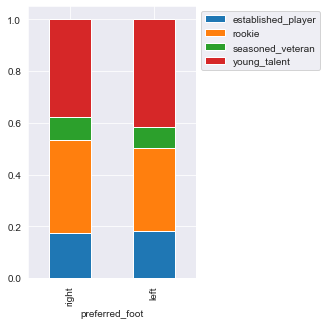

In [77]:
stacked_barplot(df, "preferred_foot", "age_group")

## Observation
- shows the preferred_foot breakdown of the soccer player's career

## Clean "work_rate"

In [78]:
df[df["work_rate"] == 'n/a/ n/a'].shape

(32, 18)

In [79]:
df["work_rate"].value_counts()

medium/ medium    10049
high/ medium       3063
medium/ high       1403
high/ high          817
medium/ low         762
high/ low           710
low/ medium         367
low/ high           342
low/ low             77
n/a/ n/a             32
Name: work_rate, dtype: int64

In [80]:
# Replace 'n/a/ n/a' with np.nan in the 'work rate' column
df['work_rate'] = df['work_rate'].replace('n/a/ n/a', np.nan)

In [81]:
df.isnull().sum()

name                         0
nationality                  0
overall                      0
potential                    0
club                         0
preferred_foot               0
international_reputation     0
weak_foot                    0
skill_moves                  0
work_rate                   32
body_type                    0
position                     0
height(cm.)                  0
weight(lbs.)                 0
age_group                    0
special_group                0
value(£)_group               0
years_played                 0
dtype: int64

In [82]:
#Let's drop the rows containing NaN
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

name                        0
nationality                 0
overall                     0
potential                   0
club                        0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
position                    0
height(cm.)                 0
weight(lbs.)                0
age_group                   0
special_group               0
value(£)_group              0
years_played                0
dtype: int64

## Observation
- Data is cleaned, no missing data

age_group       established_player  rookie  seasoned_veteran  young_talent  \
work_rate                                                                    
All                           3090    6175              1515          6810   
medium/ medium                1378    4262               638          3771   
high/ medium                   691     854               243          1275   
medium/ high                   325     299               208           571   
high/ high                     251     105               107           354   
medium/ low                    151     231               101           279   
high/ low                      136     196                81           297   
low/ high                       86      76                65           115   
low/ medium                     64     123                55           125   
low/ low                         8      29                17            23   

age_group         All  
work_rate              
All            

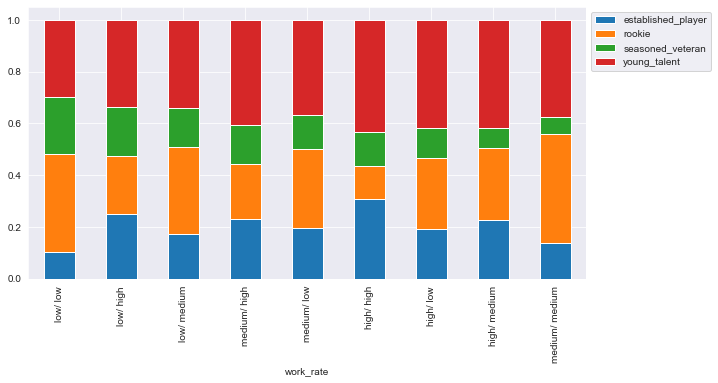

In [84]:
stacked_barplot(df, "work_rate", "age_group")

## Observation
- shows the work_rate breakdown of the soccer player's career

age_group         established_player  rookie  seasoned_veteran  young_talent  \
body_type                                                                      
All                             3090    6175              1515          6810   
normal (170-185)                1184    2068               548          2426   
normal (185+)                    710     948               426          1386   
lean (170-185)                   474    1781               186          1495   
lean (185+)                      252     788                96           705   
stocky (170-185)                 139      62                82           149   
normal (170-)                    124     211                56           305   
stocky (185+)                     69      38                46            92   
unique                            60       1                46            26   
stocky (170-)                     23      17                15            31   
lean (170-)                       55    

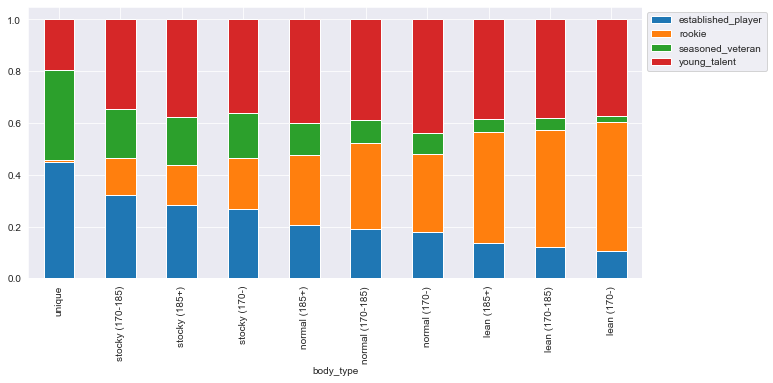

In [85]:
stacked_barplot(df, "body_type", "age_group")

## Observation
- shows the body_type breakdown of the soccer player's career

age_group        established_player  rookie  seasoned_veteran  young_talent  \
special_group                                                                 
All                            3090    6175              1515          6810   
high_special                   1857     549               972          2421   
low_special                     483    3203               286          1843   
average_special                 750    2423               257          2546   

age_group          All  
special_group           
All              17590  
high_special      5799  
low_special       5815  
average_special   5976  
------------------------------------------------------------------------------------------------------------------------


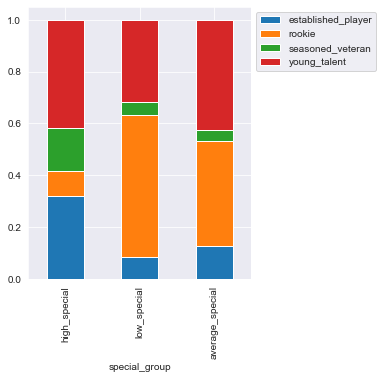

In [86]:
stacked_barplot(df, "special_group", "age_group")

## Observation
- shows the special_group breakdown of the soccer player's career

## As a Bonus, We Investigated the Value-Group Groupings and Other Feature Groupings

In [87]:
critical_categorical_features = ['preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group']

In [88]:
for i in critical_categorical_features:
    print(df[i].value_counts(normalize = True))

    print('*' * 40)
    print()

right   0.773
left    0.227
Name: preferred_foot, dtype: float64
****************************************

1.000   0.926
2.000   0.050
3.000   0.019
4.000   0.004
5.000   0.000
Name: international_reputation, dtype: float64
****************************************

3.000   0.623
2.000   0.232
4.000   0.120
5.000   0.015
1.000   0.009
Name: weak_foot, dtype: float64
****************************************

2.000   0.552
3.000   0.278
1.000   0.107
4.000   0.060
5.000   0.004
Name: skill_moves, dtype: float64
****************************************

medium/ medium   0.571
high/ medium     0.174
medium/ high     0.080
high/ high       0.046
medium/ low      0.043
high/ low        0.040
low/ medium      0.021
low/ high        0.019
low/ low         0.004
Name: work_rate, dtype: float64
****************************************

normal (170-185)   0.354
lean (170-185)     0.224
normal (185+)      0.197
lean (185+)        0.105
normal (170-)      0.040
lean (170-)        0.030
stocky (170-1

## <b>Pandas CrossTab Data Viz Investigation</b>

- Indicator Variables or Dummy Variable Analysis
  - I think we should be looking ONLY the independent variable combinations.
    - here we show how the response interacts with other independent variables.
    - the goal is to add the cross-tab variables to the model.

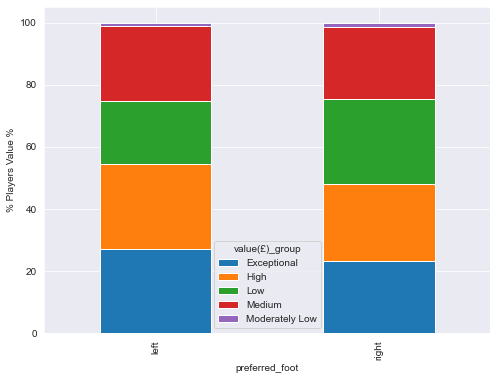

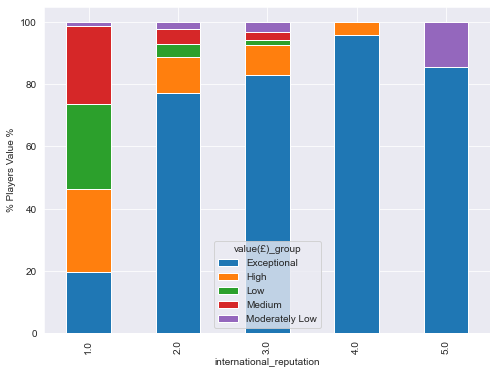

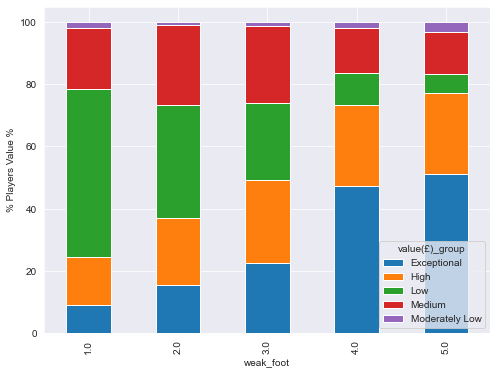

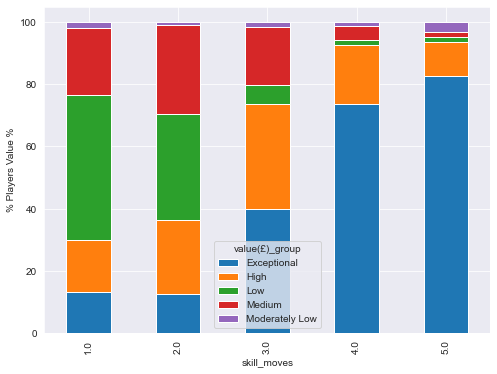

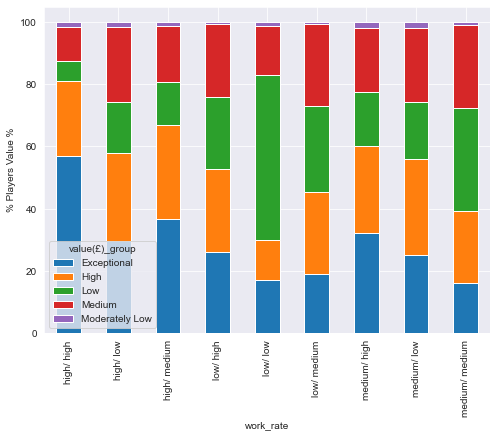

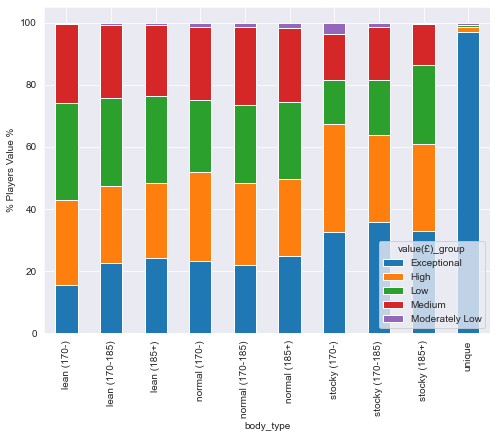

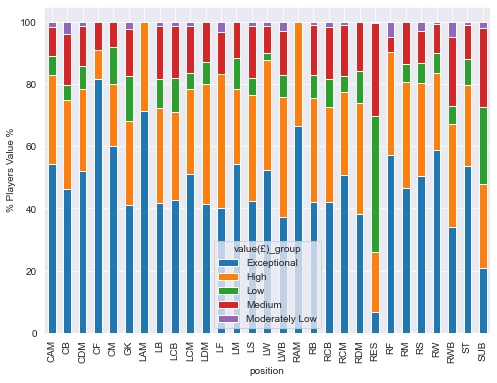

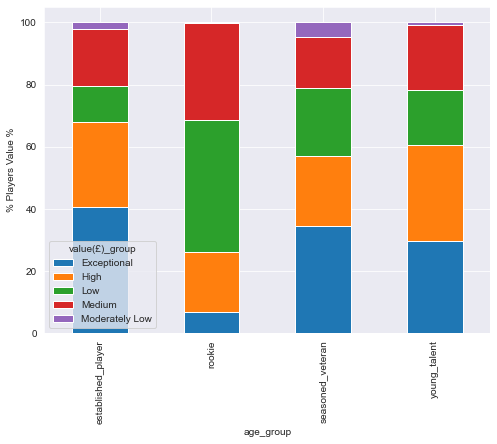

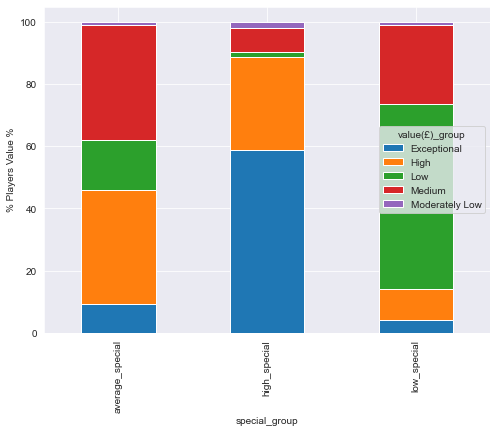

In [89]:
for i in critical_categorical_features:
    if i != 'value(£)_group':
        (pd.crosstab(df[i], df['value(£)_group'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 6), stacked = True)
        plt.ylabel('% Players Value %')

## 1. <b>"value(£)_group" vs preferred foot</b>

value(£)_group  Exceptional  High   Low  Medium  Moderately Low    All
preferred_foot                                                        
All                    4217  4480  4526    4154             213  17590
right                  3140  3376  3722    3182             174  13594
left                   1077  1104   804     972              39   3996
------------------------------------------------------------------------------------------------------------------------


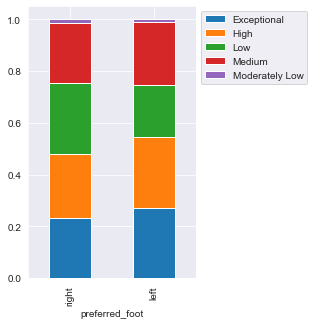

In [90]:
stacked_barplot(df, "preferred_foot", "value(£)_group")

## 2. <b>"value(£)_group" vs international reputation</b>

value(£)_group            Exceptional  High   Low  Medium  Moderately Low  \
international_reputation                                                    
All                              4217  4480  4526    4154             213   
1.0                              3181  4342  4483    4103             183   
2.0                               682   102    37      43              18   
3.0                               281    33     6       8              11   
5.0                                 6     0     0       0               1   
4.0                                67     3     0       0               0   

value(£)_group              All  
international_reputation         
All                       17590  
1.0                       16292  
2.0                         882  
3.0                         339  
5.0                           7  
4.0                          70  
---------------------------------------------------------------------------------------------------------------

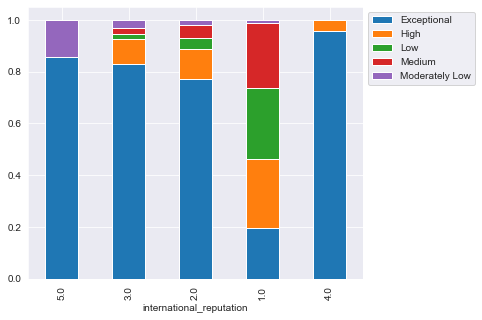

In [91]:
stacked_barplot(df, "international_reputation", "value(£)_group")

## 3. <b>"value(£)_group" vs weak foot</b>

value(£)_group  Exceptional  High   Low  Medium  Moderately Low    All
weak_foot                                                             
All                    4217  4480  4526    4154             213  17590
3.0                    2449  2951  2718    2722             124  10964
4.0                     996   551   219     305              43   2114
2.0                     622   883  1483    1058              35   4081
5.0                     135    69    16      36               8    264
1.0                      15    26    90      33               3    167
------------------------------------------------------------------------------------------------------------------------


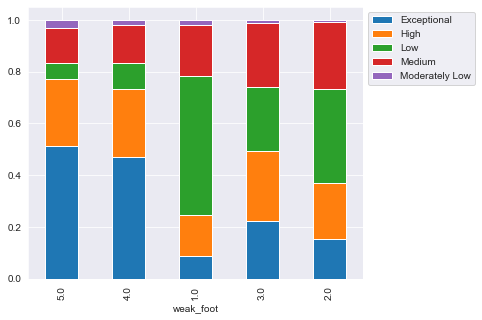

In [92]:
stacked_barplot(df, "weak_foot", "value(£)_group")

## 4. <b>"value(£)_group" vs skill moves</b>

value(£)_group  Exceptional  High   Low  Medium  Moderately Low    All
skill_moves                                                           
All                    4217  4480  4526    4154             213  17590
2.0                    1201  2312  3328    2781              92   9714
3.0                    1947  1645   304     919              72   4887
1.0                     247   316   876     407              33   1879
4.0                     770   200    17      46              14   1047
5.0                      52     7     1       1               2     63
------------------------------------------------------------------------------------------------------------------------


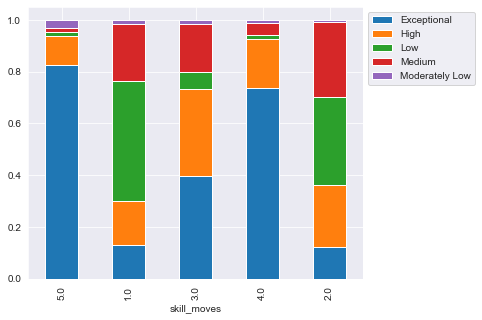

In [93]:
stacked_barplot(df, "skill_moves", "value(£)_group")

## 5. <b>"value(£)_group" vs work rate</b>

value(£)_group  Exceptional  High   Low  Medium  Moderately Low    All
work_rate                                                             
All                    4217  4480  4526    4154             213  17590
medium/ medium         1611  2328  3326    2678             106  10049
high/ medium           1118   928   426     552              39   3063
medium/ high            450   393   243     291              26   1403
medium/ low             191   236   138     183              14    762
high/ high              465   196    54      89              13    817
high/ low               210   202   116     172              10    710
low/ high                89    91    80      80               2    342
low/ medium              70    96   102      97               2    367
low/ low                 13    10    41      12               1     77
------------------------------------------------------------------------------------------------------------------------


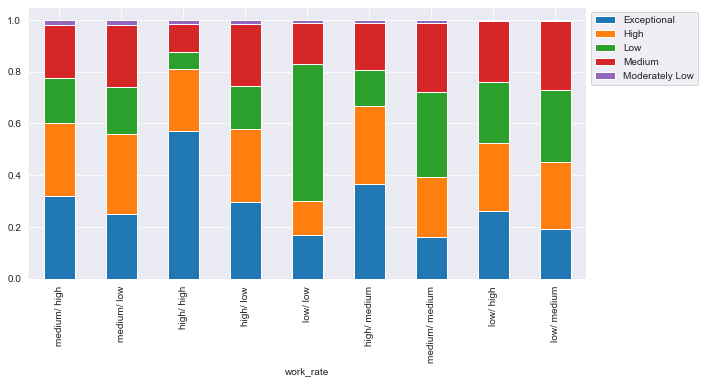

In [94]:
stacked_barplot(df, "work_rate", "value(£)_group")

value(£)_group  Exceptional  High   Low  Medium  Moderately Low    All
work_rate                                                             
All                    4217  4480  4526    4154             213  17590
medium/ medium         1611  2328  3326    2678             106  10049
high/ medium           1118   928   426     552              39   3063
medium/ high            450   393   243     291              26   1403
medium/ low             191   236   138     183              14    762
high/ high              465   196    54      89              13    817
high/ low               210   202   116     172              10    710
low/ high                89    91    80      80               2    342
low/ medium              70    96   102      97               2    367
low/ low                 13    10    41      12               1     77
------------------------------------------------------------------------------------------------------------------------


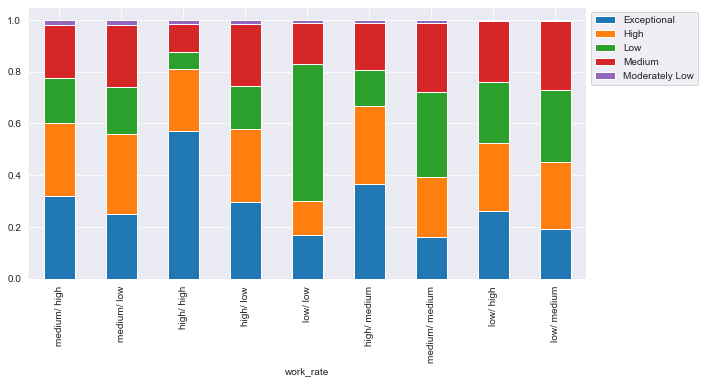

In [95]:
stacked_barplot(df, "work_rate", "value(£)_group")

## 6. <b>"value(£)_group" vs body type</b>

value(£)_group    Exceptional  High   Low  Medium  Moderately Low    All
body_type                                                               
All                      4217  4480  4526    4154             213  17590
normal (170-185)         1378  1639  1552    1573              84   6226
normal (185+)             865   856   861     829              59   3470
lean (170-185)            890   978  1117     920              31   3936
lean (185+)               449   441   519     416              16   1841
normal (170-)             161   200   161     165               9    696
stocky (170-185)          155   121    76      74               6    432
lean (170-)                81   145   164     132               3    525
stocky (170-)              28    30    12      13               3     86
stocky (185+)              81    68    63      32               1    245
unique                    129     2     1       0               1    133
---------------------------------------------------

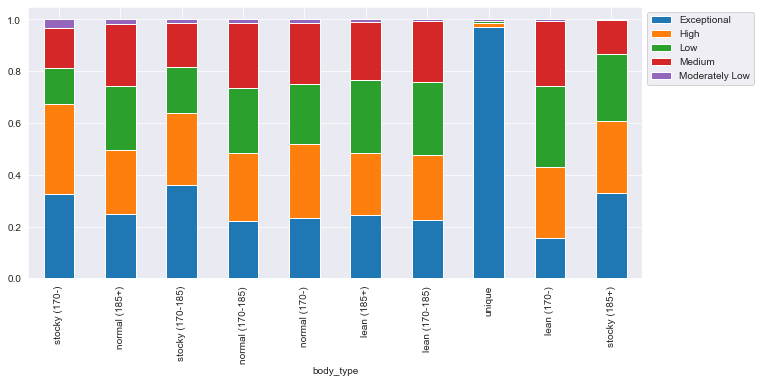

In [96]:
stacked_barplot(df, "body_type", "value(£)_group")

## 7.<b>"value(£)_group" vs position</b>

value(£)_group  Exceptional  High   Low  Medium  Moderately Low    All
position                                                              
All                    4217  4480  4526    4154             213  17590
SUB                    1560  2002  1849    1885             141   7437
RES                     342  1008  2287    1558               9   5204
GK                      154   101    54      57               8    374
RCB                     187   135    40      75               7    444
LCB                     169   113    44      66               5    397
CB                       50    31     5      18               4    108
RWB                      29    28     5      19               4     85
RS                       72    43     9      15               4    143
LB                      137   101    31      56               4    329
LCM                     158    84    16      47               4    309
ST                      185    90    29      38               3    345
RCM   

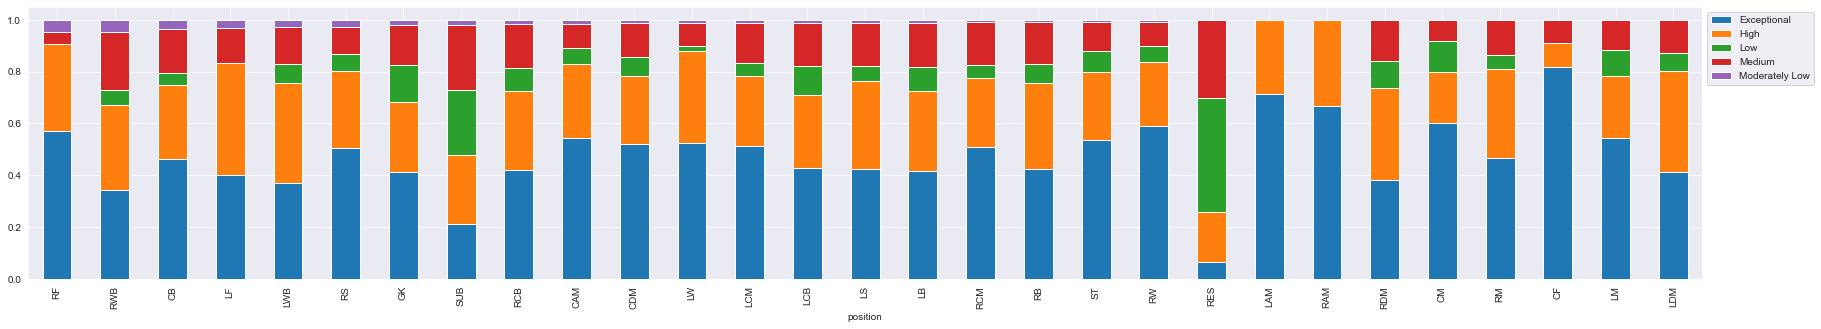

In [97]:
stacked_barplot(df, "position", "value(£)_group")

## 8. <b>"value(£)_group" vs age_group</b>

value(£)_group      Exceptional  High   Low  Medium  Moderately Low    All
age_group                                                                 
All                        4217  4480  4526    4154             213  17590
seasoned_veteran            522   342   331     250              70   1515
established_player         1253   851   354     565              67   3090
young_talent               2029  2091  1213    1419              58   6810
rookie                      413  1196  2628    1920              18   6175
------------------------------------------------------------------------------------------------------------------------


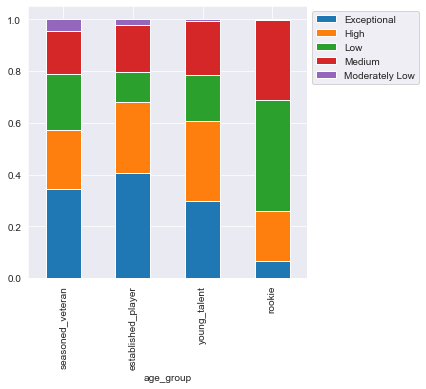

In [98]:
stacked_barplot(df, "age_group", "value(£)_group")

## 9. <b>"value(£)_group" vs Special Group</b>

value(£)_group   Exceptional  High   Low  Medium  Moderately Low    All
special_group                                                          
All                     4217  4480  4526    4154             213  17590
high_special            3413  1725    93     457             111   5799
average_special          558  2181   977    2208              52   5976
low_special              246   574  3456    1489              50   5815
------------------------------------------------------------------------------------------------------------------------


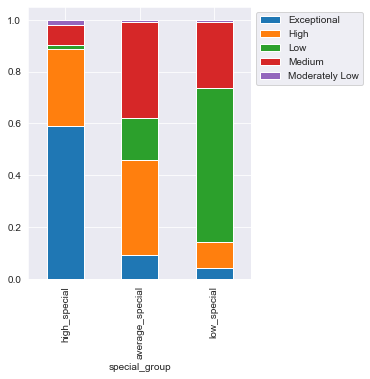

In [99]:
stacked_barplot(df, "special_group", "value(£)_group")

## Observation
- The groupings output data viz's are very interesting.
- Each data viz tells thier own story

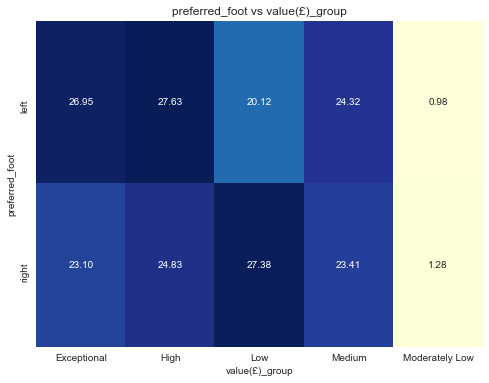

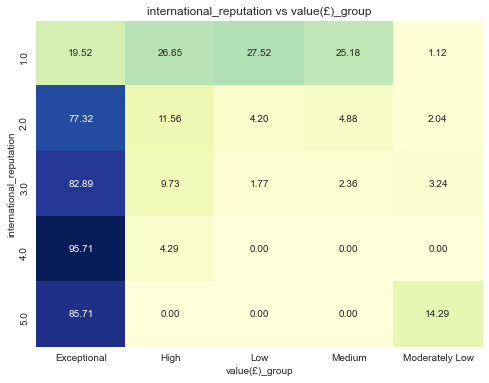

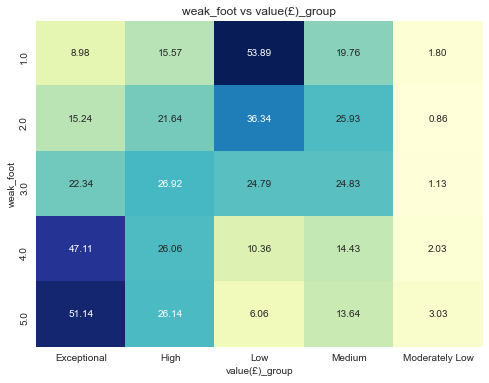

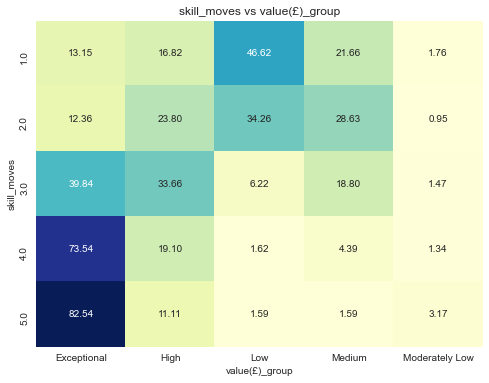

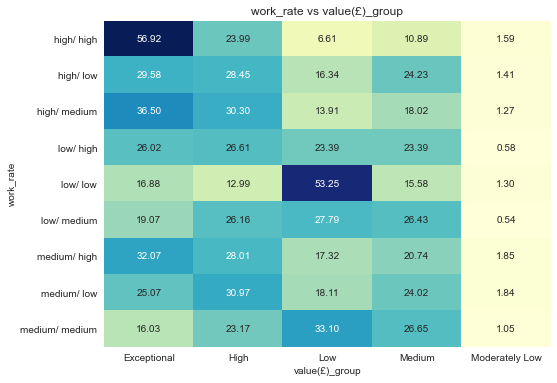

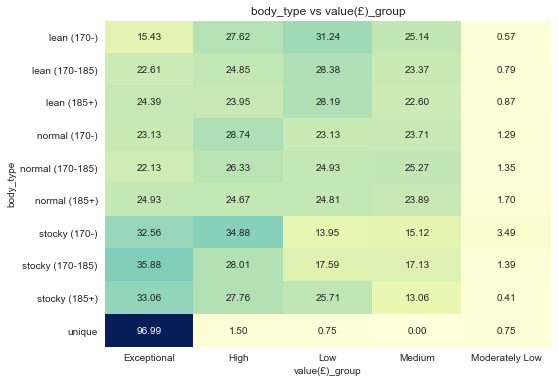

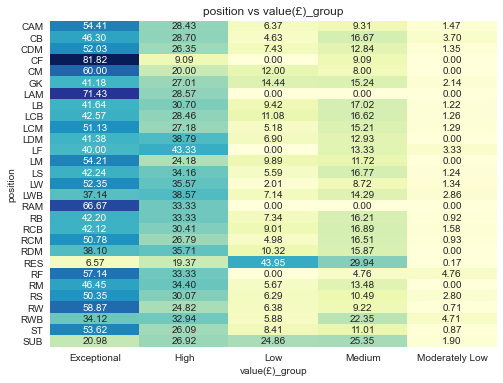

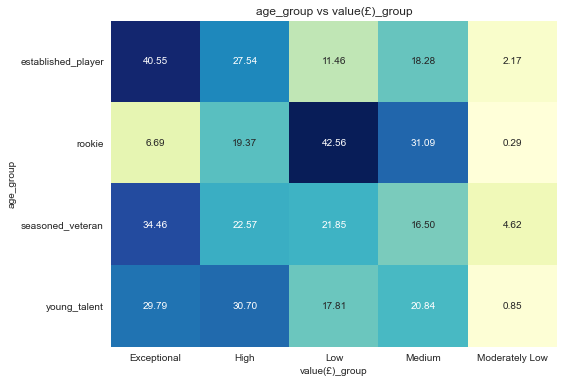

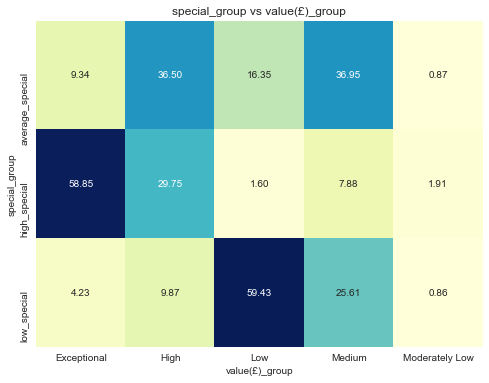

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in critical_categorical_features:
    if i != 'value(£)_group':
        # Create a cross-tabulation
        cross_tab = pd.crosstab(df[i], df['value(£)_group'], normalize='index') * 100

        # Visualize the cross-tabulation
        plt.figure(figsize=(8, 6))
        sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
        plt.title(f'{i} vs value(£)_group')
        plt.ylabel(i)
        plt.xlabel('value(£)_group')
        plt.show()

## Observation
- Using statistical analysis and the heatmap, we wanted to identify which features were correlated.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17590 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17590 non-null  object 
 1   nationality               17590 non-null  object 
 2   overall                   17590 non-null  int64  
 3   potential                 17590 non-null  int64  
 4   club                      17590 non-null  object 
 5   preferred_foot            17590 non-null  object 
 6   international_reputation  17590 non-null  float64
 7   weak_foot                 17590 non-null  float64
 8   skill_moves               17590 non-null  float64
 9   work_rate                 17590 non-null  object 
 10  body_type                 17590 non-null  object 
 11  position                  17590 non-null  object 
 12  height(cm.)               17590 non-null  float64
 13  weight(lbs.)              17590 non-null  float64
 14  age_gr

In [102]:
df_test = df.copy()

## **Choose and explain what metric(s) you will use to evaluate your algorithm’s performance.**

<b>[1.0 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a <b>detailed argument for why this (these) metric(s) are appropriate</b> on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17590 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17590 non-null  object 
 1   nationality               17590 non-null  object 
 2   overall                   17590 non-null  int64  
 3   potential                 17590 non-null  int64  
 4   club                      17590 non-null  object 
 5   preferred_foot            17590 non-null  object 
 6   international_reputation  17590 non-null  float64
 7   weak_foot                 17590 non-null  float64
 8   skill_moves               17590 non-null  float64
 9   work_rate                 17590 non-null  object 
 10  body_type                 17590 non-null  object 
 11  position                  17590 non-null  object 
 12  height(cm.)               17590 non-null  float64
 13  weight(lbs.)              17590 non-null  float64
 14  age_gr

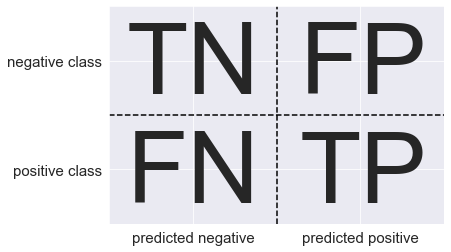

In [104]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

Given that we are dealing with an imbalanced dataset and our task is to predict the soccer players' "value(£)_group," accuracy might not be the best metric to evaluate your model's performance. This is because accuracy can be misleading in imbalanced datasets, where the majority class dominates the predictions.

In the context of predicting the "value(£)_group," we considered metrics that provide a more comprehensive understanding of your model's performance. Here are some metrics to consider and the reasons for their relevance:

1. **Precision:**
   - **Definition:** Precision measures the proportion of correctly predicted positive instances among the instances predicted as positive.
   - **Relevance:** Precision is important when you want to minimize false positives. In your case, it would mean reducing the number of players incorrectly classified as having a certain value group.

2. **Recall (Sensitivity or True Positive Rate):**
   - **Definition:** Recall measures the proportion of correctly predicted positive instances among all actual positive instances.
   - **Relevance:** Recall is crucial when you want to capture as many positive instances as possible. For instance, if identifying high-value players is a priority, you want to minimize false negatives.

3. **F1 Score:**
   - **Definition:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - **Relevance:** F1 score is suitable when you want to balance the trade-off between precision and recall. It's especially useful in imbalanced datasets, where optimizing for one may harm the other.

In summary, our team selected the F1 Score as the metric.  Especially since we are dealing with an imbalanced data set.  As always, the choice of the best metric depends on the specific goals and priorities of your task. If you have a specific emphasis on minimizing false positives or false negatives, you might prioritize precision or recall, respectively. The F1 score gives a balanced view, considering both precision and recall, making it a good overall metric for imbalanced datasets. Consider using a combination of these metrics to thoroughly evaluate your deep learning model's performance.  

## Relation to accuracy

## Accuracy = (TP + TN)/(TP + TN + FP + FN)
Accuracy is the number of correct predictions (TP
and TN) divided by the number of samples (all entries of the confusion matrix summed up).

## Precision = TP/(TP + FP)
Precision measures how many of the samples predicted as positive are actually positive.

Precision is used as a performance metric when the goal is to limit the number of false positives. 

## Recall = TP/(TP + FN)
Recall measures how many of the positive samples are captured by the positive predictions.

Recall is used a performance metric when we need to identify all positive samples when it is important to avoid false negatives. The cancer diagnosis example for this:

It is important to find all people who are sick, possibly including healthy patients in the prediction. Other names for recall are sensitivity, hit rate, or true positive rate (TPR).

There is a trade-off between optimizing recall and optimizing precision. You can trivially obtain s perfect recall if you predict all samples to belong to the positive class -- there will be no false negatives, and no true negatives either. However, prediciting all samples as positive will result in many false positives, and therefore the precision will be very low. On the other hand, if you find a model that predicts only the single data point it is most sure about as positive and the rest as negative, then precision will be perfect (assuming this data point is in fact positive), but recall will be very bad.

- FP is also known as Type I Error
- FN is also known as Type II Error


## F1 SCORE

The F1 score is a statistical measure of a model's performance that combines precision and recall into a single metric. It is particularly useful when there is an uneven class distribution (e.g., when one class is much more prevalent than the other) because it considers both false positives and false negatives.

The F1 score is calculated as the harmonic mean of precision and recall:


## F1 SCORE = (2 * Precision * Recall)/(Precision + Recall)



## <b>Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?</b>

<b>[1.0 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

## <b>Observation:  Summary of Selecting Tools</b>

### Data Splitting Method:

Our team has decided to use **Stratified 10-fold cross-validation** (`StratifiedKFold(n_splits=10)`).

**Reasoning:**
- This method is appropriate when dealing with an imbalanced dataset, as it ensures that each fold maintains the same class distribution as the original dataset.
- Stratified cross-validation is particularly useful when you have minority classes that might be underrepresented in the dataset.

### Scoring Method:

Our team has chosen to use the **F1 score** as our scoring method, and you've appropriately defined it using `make_scorer(f1_score)`.

**Reasoning:**
- The dataset is imbalanced, meaning that there is a significant difference in the number of instances between different classes. In such cases, accuracy alone might not be a reliable metric.
- F1 score is a suitable choice, especially for imbalanced datasets, as it considers both precision and recall. It provides a balance between false positives and false negatives, making it a robust metric for classification tasks.

### Overall Approach:

- Our chosen approach reflects a thoughtful consideration of the dataset's characteristics, aiming to address issues related to imbalanced classes.
- By using Stratified 10-fold cross-validation, you are ensuring that the evaluation process is robust and representative of the class distribution in each fold.
- The F1 score as the scoring method aligns well with the imbalanced nature of the dataset, providing a more comprehensive evaluation of the model's performance.

In summary, our approach demonstrates a careful selection of techniques that are well-suited for handling imbalanced datasets and ensuring a realistic mirroring of how the algorithm would be used in practice.

## Data Preprocessing

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17590 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17590 non-null  object 
 1   nationality               17590 non-null  object 
 2   overall                   17590 non-null  int64  
 3   potential                 17590 non-null  int64  
 4   club                      17590 non-null  object 
 5   preferred_foot            17590 non-null  object 
 6   international_reputation  17590 non-null  float64
 7   weak_foot                 17590 non-null  float64
 8   skill_moves               17590 non-null  float64
 9   work_rate                 17590 non-null  object 
 10  body_type                 17590 non-null  object 
 11  position                  17590 non-null  object 
 12  height(cm.)               17590 non-null  float64
 13  weight(lbs.)              17590 non-null  float64
 14  age_gr

In [106]:
df["value(£)_group"].value_counts()

Low               4526
High              4480
Exceptional       4217
Medium            4154
Moderately Low     213
Name: value(£)_group, dtype: int64

## Save DataFrame For Future Modeling

In [107]:
df_model = df.copy()

In [108]:
continuous_features = list(df.describe(include=["int64", "float64"]).columns)
continuous_features

['overall',
 'potential',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'height(cm.)',
 'weight(lbs.)',
 'years_played']

In [109]:
categorical_features = list(df.describe(include=["object", "category"]).columns)
categorical_features

['name',
 'nationality',
 'club',
 'preferred_foot',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group',
 'value(£)_group']

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ========================================================
# define objects that can encode each variable as integer
encoders = dict()  # save each encoder in dictionary
categorical_headers = ['name', 'nationality', 'club', 'preferred_foot', 'work_rate', 'body_type', 'position', 
                       'age_group', 'special_group']

# train all encoders (including the target 'value(£)_group')
for col in categorical_headers + ['value(£)_group']:
    df[col] = df[col].str.strip()

    if col == "value(£)_group":
        # special case the target, just replace the column
        tmp = LabelEncoder()
        df[col] = tmp.fit_transform(df[col])
    else:
        # integer encode strings that are features
        encoders[col] = LabelEncoder()  # save the encoder
        df[col + '_int'] = encoders[col].fit_transform(df[col])

# ========================================================
# scale the numeric, continuous variables


numeric_headers = ["overall", "potential", "height(cm.)", "weight(lbs.)", "years_played",
                   'international_reputation', 'weak_foot', 'skill_moves',]

ss = StandardScaler()
df[numeric_headers] = ss.fit_transform(df[numeric_headers].values)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17590 entries, 0 to 17659
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      17590 non-null  object 
 1   nationality               17590 non-null  object 
 2   overall                   17590 non-null  float64
 3   potential                 17590 non-null  float64
 4   club                      17590 non-null  object 
 5   preferred_foot            17590 non-null  object 
 6   international_reputation  17590 non-null  float64
 7   weak_foot                 17590 non-null  float64
 8   skill_moves               17590 non-null  float64
 9   work_rate                 17590 non-null  object 
 10  body_type                 17590 non-null  object 
 11  position                  17590 non-null  object 
 12  height(cm.)               17590 non-null  float64
 13  weight(lbs.)              17590 non-null  float64
 14  age_gr

In [112]:
df_combine = df.copy()

In [113]:
df = df.drop(categorical_headers, axis = 1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17590 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   overall                   17590 non-null  float64
 1   potential                 17590 non-null  float64
 2   international_reputation  17590 non-null  float64
 3   weak_foot                 17590 non-null  float64
 4   skill_moves               17590 non-null  float64
 5   height(cm.)               17590 non-null  float64
 6   weight(lbs.)              17590 non-null  float64
 7   value(£)_group            17590 non-null  int32  
 8   years_played              17590 non-null  float64
 9   name_int                  17590 non-null  int32  
 10  nationality_int           17590 non-null  int32  
 11  club_int                  17590 non-null  int32  
 12  preferred_foot_int        17590 non-null  int32  
 13  work_rate_int             17590 non-null  int32  
 14  body_t

In [115]:
df.head()

,overall,potential,international_reputation,weak_foot,skill_moves,height(cm.),weight(lbs.),value(£)_group,years_played,name_int,nationality_int,club_int,preferred_foot_int,work_rate_int,body_type_int,position_int,age_group_int,special_group_int
0,2.946,2.613,7.268,1.659,0.931,1.164,1.100,0,1.118,9139,54,334,1,2,9,28,0,1
1,2.821,2.459,4.760,0.152,2.262,-0.272,-0.762,0,0.117,2249,119,554,1,0,9,9,0,1
2,2.696,2.153,2.252,0.152,0.931,-1.277,-0.762,0,0.117,9843,6,735,0,0,7,7,0,1
3,3.444,3.073,7.268,3.167,2.262,0.015,-0.619,0,2.618,8343,12,553,1,0,9,19,2,1
4,2.821,2.766,4.760,0.152,0.931,-1.277,-0.905,0,0.117,11584,73,479,1,0,3,19,3,1


In [116]:
# split the data
from sklearn.model_selection import train_test_split
X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

## <b>Simple ANN Model Example using StratifiedKFold (10 Fold) and Cross-Validation and F1-Scoring Metric</b>
- Here we created a simple ANN model analayzing our FIFA-23 dataset

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming X contains your independent variables and y contains the target variable
X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()

# Convert your labels to one-hot encoding:
y_one_hot = to_categorical(y)

# Initialize StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize your deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming there are 5 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Initialize a list to store F1 scores for each fold
f1_scores = []

# Iterate through the folds
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_one_hot[train_index], y_one_hot[test_index]

    # Train your DEEP LEARNING MODEL on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Predict on the test data
    y_pred_probs = model.predict(X_test)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate F1 score and append to the list
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')  # Change 'weighted' based on your multiclass setup
    f1_scores.append(f1)

# Calculate the mean F1 score across all folds
mean_f1_score = np.mean(f1_scores)

# Print the mean F1 score
print(f"Mean F1 Score: {mean_f1_score}")


Mean F1 Score: 0.6930223040920311


## <b>Observation:  Summary of Selecting Tools</b>

### Data Splitting Method:

Our team has decided to use **Stratified 10-fold cross-validation** (`StratifiedKFold(n_splits=10)`).

**Reasoning:**
- This method is appropriate when dealing with an imbalanced dataset, as it ensures that each fold maintains the same class distribution as the original dataset.
- Stratified cross-validation is particularly useful when you have minority classes that might be underrepresented in the dataset.

### Scoring Method:

Our team has chosen to use the **F1 score** as our scoring method, and you've appropriately defined it using `make_scorer(f1_score)`.

**Reasoning:**
- The dataset is imbalanced, meaning that there is a significant difference in the number of instances between different classes. In such cases, accuracy alone might not be a reliable metric.
- F1 score is a suitable choice, especially for imbalanced datasets, as it considers both precision and recall. It provides a balance between false positives and false negatives, making it a robust metric for classification tasks.

### Overall Approach:

- Our chosen approach reflects a thoughtful consideration of the dataset's characteristics, aiming to address issues related to imbalanced classes.
- By using Stratified 10-fold cross-validation, you are ensuring that the evaluation process is robust and representative of the class distribution in each fold.
- The F1 score as the scoring method aligns well with the imbalanced nature of the dataset, providing a more comprehensive evaluation of the model's performance.

In summary, our approach demonstrates a careful selection of techniques that are well-suited for handling imbalanced datasets and ensuring a realistic mirroring of how the algorithm would be used in practice.

### <a href="#TOC">TOP</a>

## <a id="univariate_data_analysis">2 - Modeling</a>


<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Deep Learning Modeling Setup(<b>5 points total</b>)</h3>
    <ul>
        <li><b>[2.0 points]</b> Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data. </li>
        <li> <b>[2.0 points]</b> Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.</li>
        <li><b>[1.0 points]</b> Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network).</li>
    </ul>
</div>

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17590 entries, 0 to 17659
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   overall                   17590 non-null  float64
 1   potential                 17590 non-null  float64
 2   international_reputation  17590 non-null  float64
 3   weak_foot                 17590 non-null  float64
 4   skill_moves               17590 non-null  float64
 5   height(cm.)               17590 non-null  float64
 6   weight(lbs.)              17590 non-null  float64
 7   value(£)_group            17590 non-null  int32  
 8   years_played              17590 non-null  float64
 9   name_int                  17590 non-null  int32  
 10  nationality_int           17590 non-null  int32  
 11  club_int                  17590 non-null  int32  
 12  preferred_foot_int        17590 non-null  int32  
 13  work_rate_int             17590 non-null  int32  
 14  body_t

In [119]:
from sklearn.model_selection import train_test_split
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Assuming these are the categorical and numeric headers for the FIFA23 dataset
categorical_headers_ints_fifa23 = [x+'_int' for x in categorical_headers]
numeric_headers_fifa23 = ["overall", "potential", "international_reputation", "weak_foot", "skill_moves", "height(cm.)", "weight(lbs.)", "years_played"]

# Combine categorical and numeric headers
feature_columns_fifa23 = categorical_headers_ints_fifa23 + numeric_headers_fifa23

# Print the selected features
print(f"We will use the following {len(feature_columns_fifa23)} features:")
pp.pprint(feature_columns_fifa23)

X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# Convert your labels to one-hot encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

We will use the following 17 features:
[   'name_int',
    'nationality_int',
    'club_int',
    'preferred_foot_int',
    'work_rate_int',
    'body_type_int',
    'position_int',
    'age_group_int',
    'special_group_int',
    'overall',
    'potential',
    'international_reputation',
    'weak_foot',
    'skill_moves',
    'height(cm.)',
    'weight(lbs.)',
    'years_played']


In [120]:
# we have the following lists now of data that we can use with our dataframes:
print("Numeric Headers:")
pp.pprint(numeric_headers) # normalized numeric data
print("\nCategorical String Headers:")
pp.pprint(categorical_headers) # string data
print("\nCategorical Headers, Encoded as Integer:")
pp.pprint(categorical_headers_ints_fifa23) # string data encoded as an integer

Numeric Headers:
[   'overall',
    'potential',
    'height(cm.)',
    'weight(lbs.)',
    'years_played',
    'international_reputation',
    'weak_foot',
    'skill_moves']

Categorical String Headers:
[   'name',
    'nationality',
    'club',
    'preferred_foot',
    'work_rate',
    'body_type',
    'position',
    'age_group',
    'special_group']

Categorical Headers, Encoded as Integer:
[   'name_int',
    'nationality_int',
    'club_int',
    'preferred_foot_int',
    'work_rate_int',
    'body_type_int',
    'position_int',
    'age_group_int',
    'special_group_int']


In [121]:
import os
os.environ['AUTOGRAPH_VERBOSITY'] = '0'

from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [122]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model

In [123]:
# Now let's define the architecture for a multi-layer network

# First, lets setup the input size
num_features = X_train.shape[1]
input_tensor = Input(shape=(num_features,))

# a layer instance is callable on a tensor, and returns a tensor
# Dense means a fully connected layer, with 10 hidden neurons and a bias term
x = Dense(units=10, activation='relu')(input_tensor)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=predictions)

## Adding more customization

For this particular optimization, we could go beyond SGD and use a different optimizer. There are many excellent explanations of different optimizers, for instance:

    http://sebastianruder.com/optimizing-gradient-descent/

Now that we have defined the model, its as simple as using it in a very familiar syntax:

In [124]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                180       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


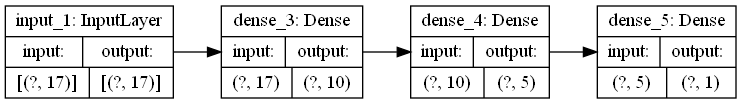

In [125]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [126]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

# now lets see how well the model performed
from sklearn import metrics as mt
yhat_proba = model.predict(X_test) # sigmoid output probabilities
yhat = np.round(yhat_proba) # round to get binary class

print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/10
282/282 [==============================] - 0s 436us/step - loss: 1.7348 - accuracy: 0.2536
Epoch 2/10
282/282 [==============================] - 0s 437us/step - loss: 1.5912 - accuracy: 0.2546
Epoch 3/10
282/282 [==============================] - 0s 438us/step - loss: 1.5745 - accuracy: 0.2546
Epoch 4/10
282/282 [==============================] - 0s 471us/step - loss: 1.5675 - accuracy: 0.2547
Epoch 5/10
282/282 [==============================] - 0s 447us/step - loss: 1.5637 - accuracy: 0.2547
Epoch 6/10
282/282 [==============================] - 0s 430us/step - loss: 1.5612 - accuracy: 0.2547
Epoch 7/10
282/282 [==============================] - 0s 442us/step - loss: 1.5595 - accuracy: 0.2547
Epoch 8/10
282/282 [==============================] - 0s 447us/step - loss: 1.5583 - accuracy: 0.2547
Epoch 9/10
282/282 [==============================] - 0s 438us/step - loss: 1.5573 - accuracy: 0.2547
Epoch 10/10
282/282 [==============================] - 0s 440us/step - loss: 1.556

## Observation
- This did not work well at all!!!

In [127]:
categorical_headers

['name',
 'nationality',
 'club',
 'preferred_foot',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group']

In [128]:
numeric_headers

['overall',
 'potential',
 'height(cm.)',
 'weight(lbs.)',
 'years_played',
 'international_reputation',
 'weak_foot',
 'skill_moves']

In [129]:
type(X_train)

numpy.ndarray

In [130]:
# let's start as simply as possible, without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just use all inputs as-is
#   this is just to get an example running in Keras (its not a good idea)
feature_columns = categorical_headers_ints+numeric_headers

import pprint
pp = pprint.PrettyPrinter(indent=4)

print(f"We will use the following {len(feature_columns)} features:")
pp.pprint(feature_columns)

# combine the features into a single large matrix
#X_train = X_train[feature_columns].to_numpy()
#X_test = X_test[feature_columns].to_numpy()

#y_train = y_train['value(£)_group'].values.astype(np.int32)
#y_test = y_test['value(£)_group'].values.astype(np.int32)

We will use the following 17 features:
[   'name_int',
    'nationality_int',
    'club_int',
    'preferred_foot_int',
    'work_rate_int',
    'body_type_int',
    'position_int',
    'age_group_int',
    'special_group_int',
    'overall',
    'potential',
    'height(cm.)',
    'weight(lbs.)',
    'years_played',
    'international_reputation',
    'weak_foot',
    'skill_moves']


In [131]:
categorical_headers_ints

['name_int',
 'nationality_int',
 'club_int',
 'preferred_foot_int',
 'work_rate_int',
 'body_type_int',
 'position_int',
 'age_group_int',
 'special_group_int']

## Embedding Categorical Data
In order to add one-hot encoding, we need to separate the categorical features that are currently saved as integers and place them into Embedding layers. An embedding layer deals with integers as if they were one-hot encoded. To start, let's only create a model from these categorical variables. 

- The first decision to make is about the size of the dense feature embeddings. This is essentially a dimensionality reduction step. 
 - This can be difficult to set, but one common setting is $\log_2(N)$ or $\sqrt{N}$ where $N$ is the total number of uniques values.
- When using an Embedding, we can leave the variables represented as integers. That is, keras will use the integer representation to figure out how to one-hot-encode the variable. This is great because it means we don't need to change the variable in memory.
- We will feed all the categorical variables to the model and, internally, the model will separate out the columns and apply a separate embedding. The function we will use to get each column is the `gather` function that is part of tensorflow.

In [132]:
len(df.columns)

18

In [133]:
df.columns

Index(['overall', 'potential', 'international_reputation', 'weak_foot',
       'skill_moves', 'height(cm.)', 'weight(lbs.)', 'value(£)_group',
       'years_played', 'name_int', 'nationality_int', 'club_int',
       'preferred_foot_int', 'work_rate_int', 'body_type_int', 'position_int',
       'age_group_int', 'special_group_int'],
      dtype='object')

In [134]:
df_modified_columns = ['overall', 'potential', 'international_reputation', 'weak_foot',
       'skill_moves', 'height(cm.)', 'weight(lbs.)',
       'years_played', 'name_int', 'nationality_int', 'club_int',
       'preferred_foot_int', 'work_rate_int', 'body_type_int', 'position_int',
       'age_group_int', 'special_group_int']

In [135]:
categorical_headers

['name',
 'nationality',
 'club',
 'preferred_foot',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group']

In [136]:
for idx, col in enumerate(categorical_headers_ints):
    print(f"Value of idx : {idx}  Value of col {col}")
          

Value of idx : 0  Value of col name_int
Value of idx : 1  Value of col nationality_int
Value of idx : 2  Value of col club_int
Value of idx : 3  Value of col preferred_foot_int
Value of idx : 4  Value of col work_rate_int
Value of idx : 5  Value of col body_type_int
Value of idx : 6  Value of col position_int
Value of idx : 7  Value of col age_group_int
Value of idx : 8  Value of col special_group_int


In [137]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate

X = df.drop('value(£)_group', axis=1)
y = df['value(£)_group']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# start by getting only the categorical variables
# these matrices are all integers
X_train = pd.DataFrame(X_train, columns=df_modified_columns)[categorical_headers_ints]
X_test = pd.DataFrame(X_test, columns=df_modified_columns)[categorical_headers_ints]

embed_branches = []
all_branch_outputs = [] # this is where we will keep track of output of each branch

# feed in the entire matrix of categircal variables
input_branch = Input(shape=(X_train.shape[1],), 
                     dtype='int64', 
                     name='categorical')

# for each categorical variable
for idx,col in enumerate(categorical_headers_ints):
    
    print(f"PROCESSING ... Value of idx : {idx}  Value of col {col}.......\n")
    
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    # these lines of code do the same thing
    N = max(X_train[col].max(), X_test[col].max()) + 1
    N = len(encoders[categorical_headers[idx]].classes_)
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_branch, idx, axis=1)
    #x = input_branch[:, idx]
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs in list to concatenate later
    all_branch_outputs.append(x)
    
# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,
                     activation='sigmoid', 
                     name='combined')(final_branch)

model = Model(inputs=input_branch, outputs=final_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

PROCESSING ... Value of idx : 0  Value of col name_int.......

PROCESSING ... Value of idx : 1  Value of col nationality_int.......

PROCESSING ... Value of idx : 2  Value of col club_int.......

PROCESSING ... Value of idx : 3  Value of col preferred_foot_int.......

PROCESSING ... Value of idx : 4  Value of col work_rate_int.......

PROCESSING ... Value of idx : 5  Value of col body_type_int.......

PROCESSING ... Value of idx : 6  Value of col position_int.......

PROCESSING ... Value of idx : 7  Value of col age_group_int.......

PROCESSING ... Value of idx : 8  Value of col special_group_int.......

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
categorical (InputLayer)        [(None, 9)]          0                                            
_____________________________________________________________________

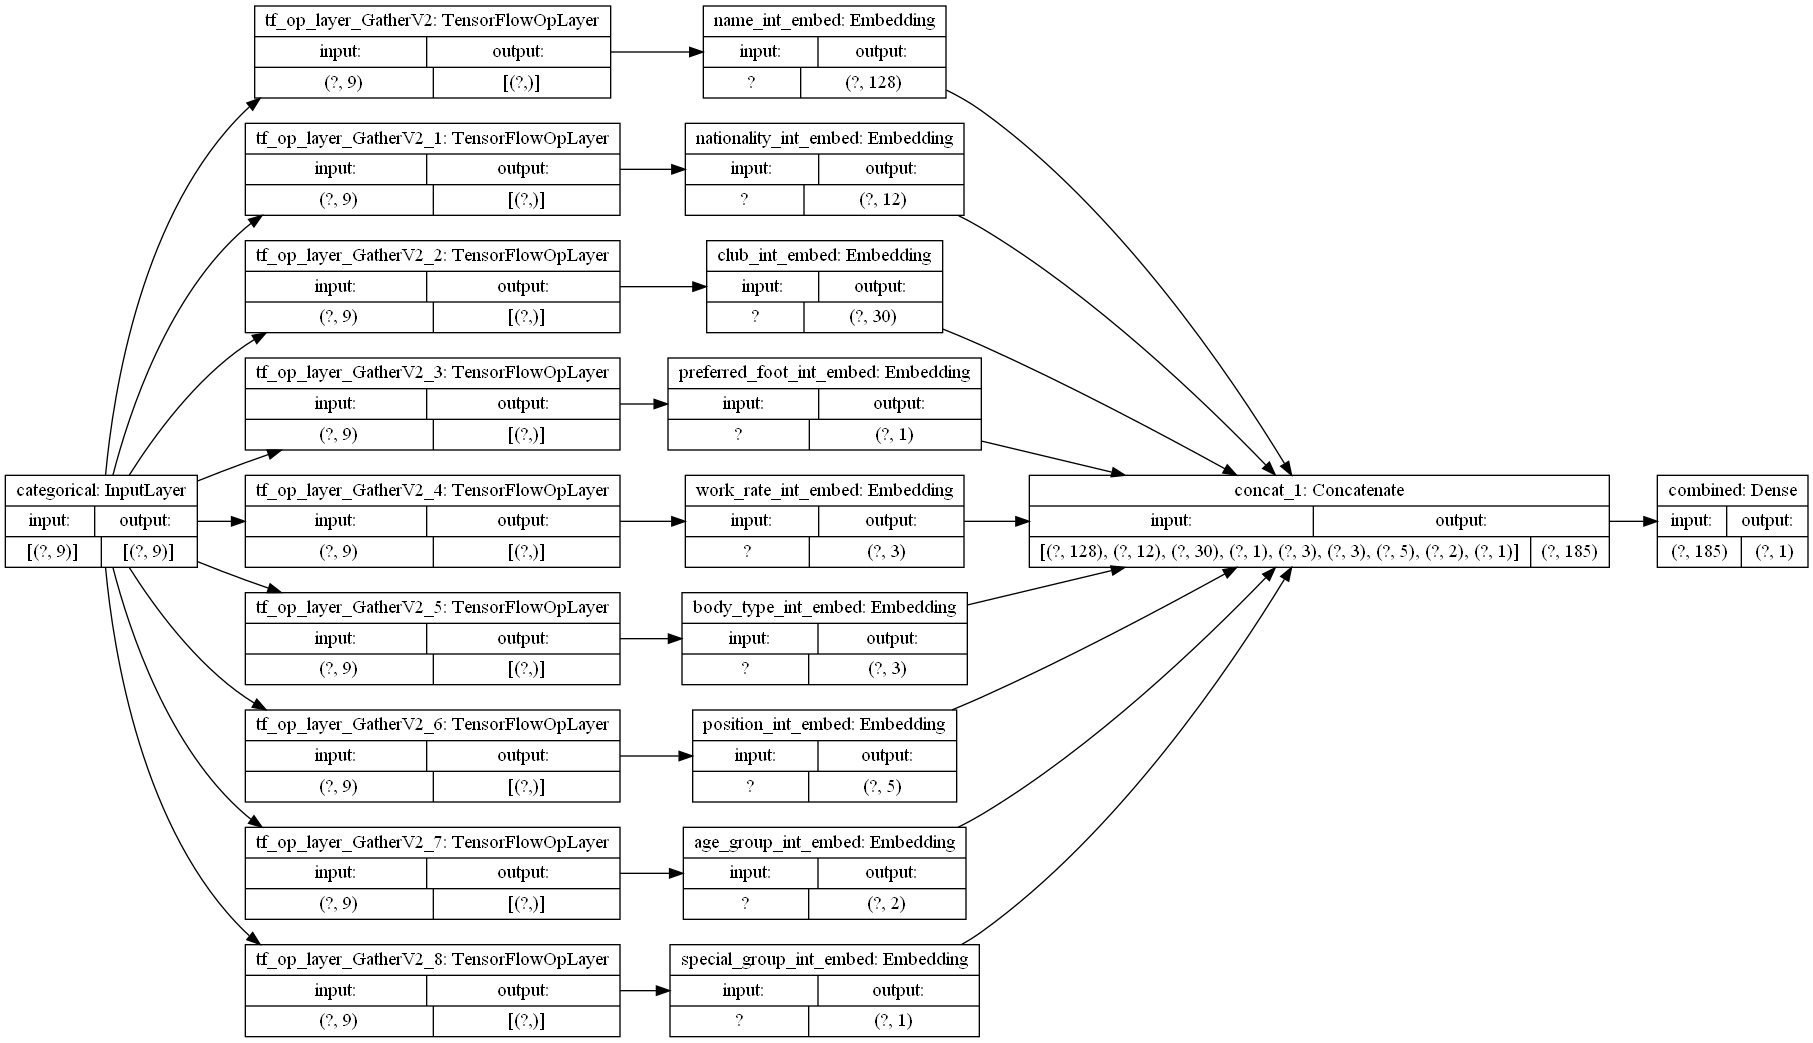

In [138]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [139]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/10
282/282 [==============================] - 0s 509us/step - loss: 2.0435 - accuracy: 0.2538
Epoch 2/10
282/282 [==============================] - 0s 533us/step - loss: 1.7666 - accuracy: 0.2547
Epoch 3/10
282/282 [==============================] - 0s 549us/step - loss: 1.6741 - accuracy: 0.2547
Epoch 4/10
282/282 [==============================] - 0s 516us/step - loss: 1.6321 - accuracy: 0.2547
Epoch 5/10
282/282 [==============================] - 0s 520us/step - loss: 1.6089 - accuracy: 0.2547
Epoch 6/10
282/282 [==============================] - 0s 527us/step - loss: 1.5947 - accuracy: 0.2547
Epoch 7/10
282/282 [==============================] - 0s 535us/step - loss: 1.5851 - accuracy: 0.2547
Epoch 8/10
282/282 [==============================] - 0s 531us/step - loss: 1.5785 - accuracy: 0.2547
Epoch 9/10
282/282 [==============================] - 0s 547us/step - loss: 1.5736 - accuracy: 0.2547
Epoch 10/10
282/282 [==============================] - 0s 530us/step - loss: 1.569

Much better!! Looks like the use of Embedding layers helped. Lets add some more of the features, using both the categorical and the integer features.

## Multi-Modal Networks: Combine Branches, Sparse and Dense
The keras functional API allows us to setup different branches of inputs. When we call the `fit` function, we can tell keras the input to each branch using a simple list (you can also use a dictionary to be more explicit).

- Lets create two matrices: 
 - one with the categorical data, `X_train_cat`
 - and another with the numeric data, `X_train_num`
 
Now, we can feed both of these into the model as a list and concatenate their results. 

In [140]:
numeric_headers

['overall',
 'potential',
 'height(cm.)',
 'weight(lbs.)',
 'years_played',
 'international_reputation',
 'weak_foot',
 'skill_moves']

In [141]:
%%time

X = df.drop('value(£)_group', axis=1)
y = df['value(£)_group']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# save categorical features
X_train_cat = pd.DataFrame(X_train, columns=df_modified_columns)[categorical_headers_ints]
X_test_cat = pd.DataFrame(X_test, columns=df_modified_columns)[categorical_headers_ints]

# and save off the numeric features
X_train_num =  pd.DataFrame(X_train, columns=df_modified_columns)[numeric_headers]
X_test_num = pd.DataFrame(X_test, columns=df_modified_columns)[numeric_headers]

all_branch_outputs = [] # this is where we will keep track of output of each branch

# -----Like previous example, use embeddings from the integer data -----
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train_cat[col].max(),X_test_cat[col].max())+1
    N = len(encoders[categorical_headers[idx]].classes_)
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_branch_outputs.append(x)
    
# -----HERE IS THE ADDING OF AN INPUT USING NUMERIC DATA-----
# create dense input branch for numeric
inputs_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=9, activation='relu', name='num_1')(inputs_num)
    
all_branch_outputs.append(x_dense)
# -------------------------------------------------------------------

# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=10, activation='relu', name='combined_1')(final_branch)
final_branch = Dense(units=1, activation='sigmoid', name='combined_2')(final_branch)

model = Model(inputs=[input_cat,inputs_num], outputs=final_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['f1_score'])

Wall time: 163 ms


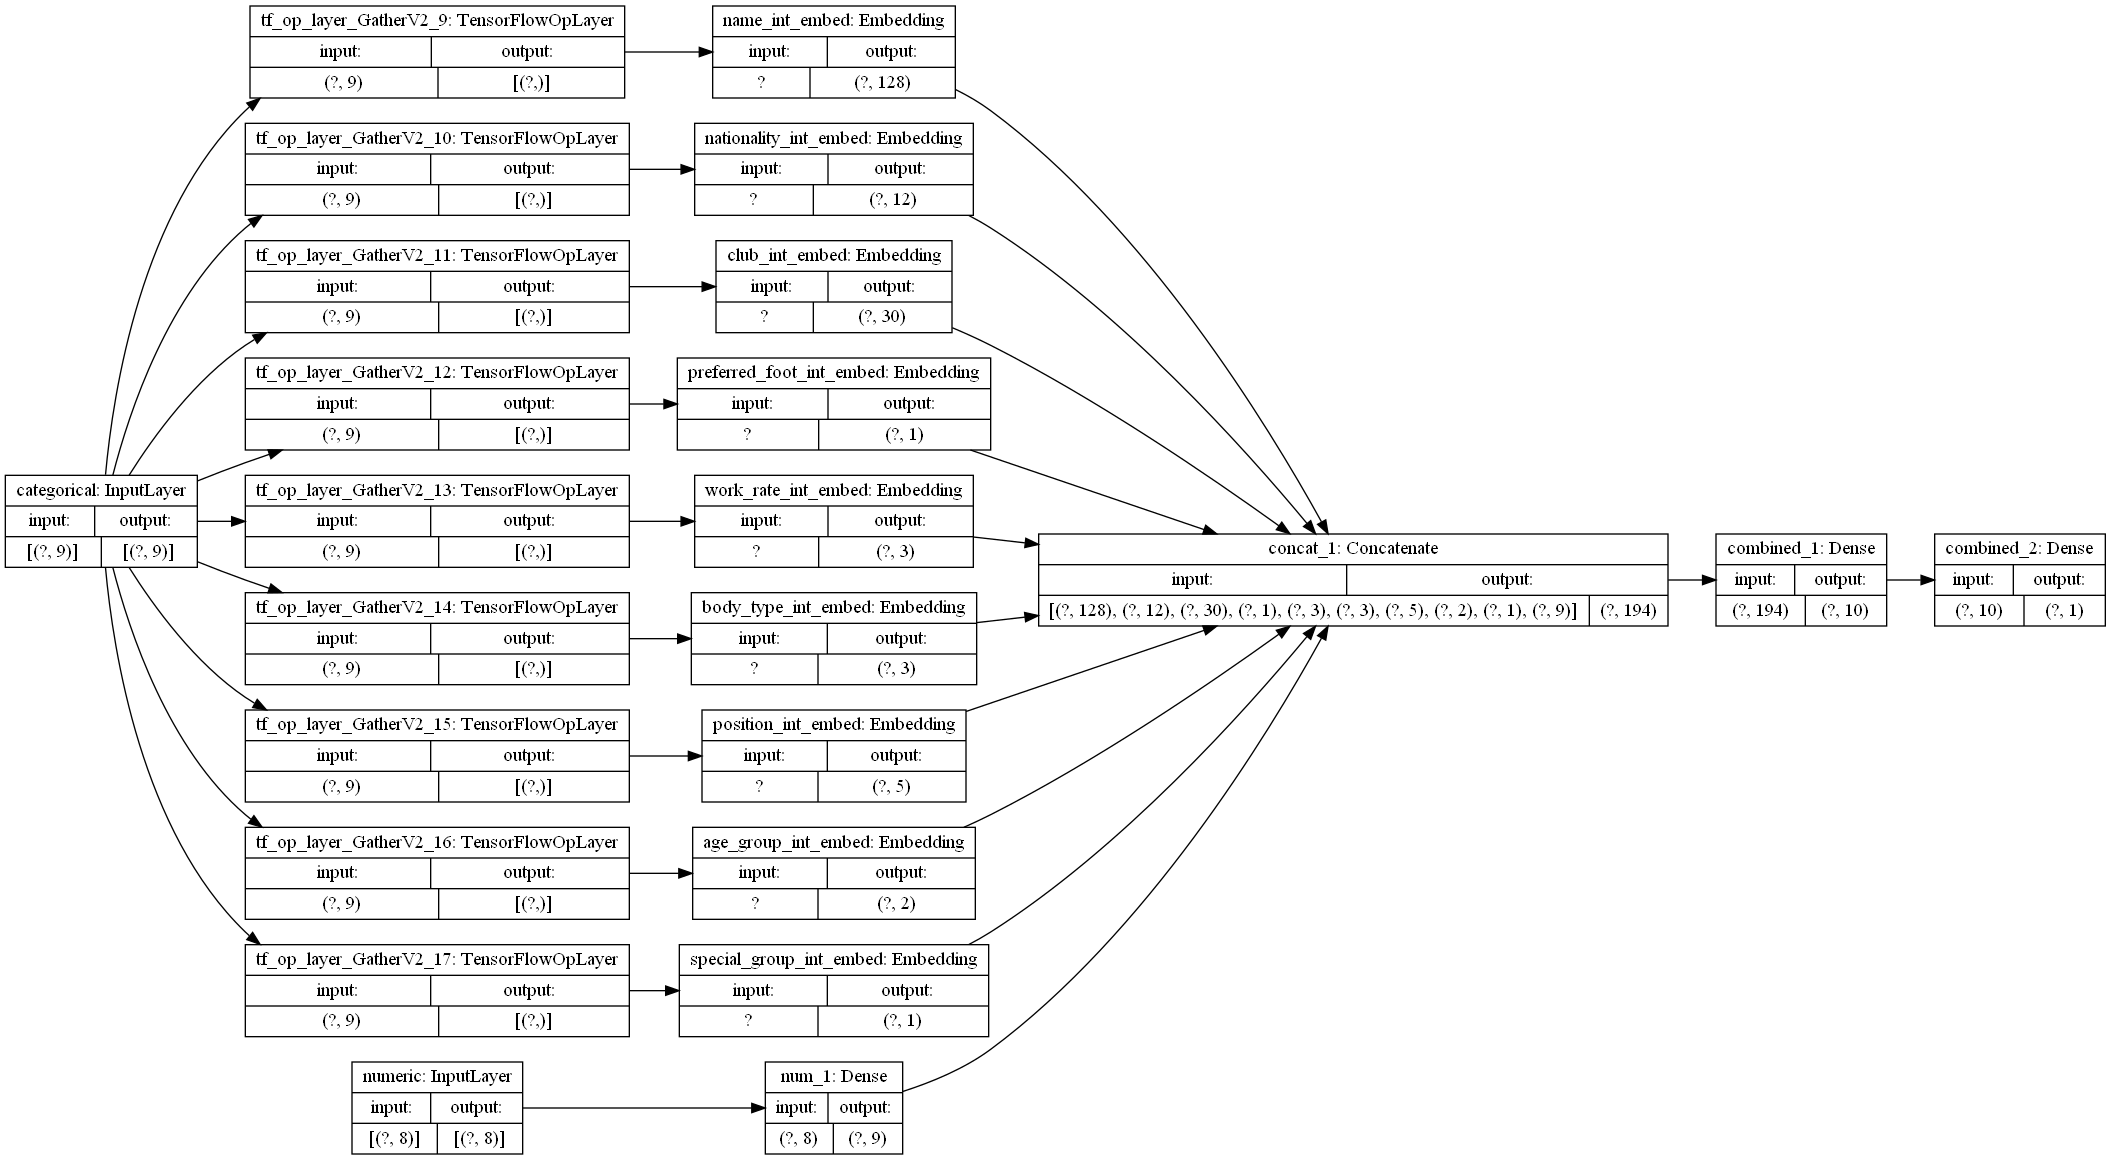

In [142]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [143]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit([ X_train_cat, X_train_num ], # inputs for each branch are a list
          y_train, 
          epochs=10, 
          batch_size=50, 
          verbose=1)

yhat = model.predict([X_test_cat,
                      X_test_num]) # each branch has an input

yhat = np.round(yhat)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Epoch 1/10
282/282 [==============================] - 0s 600us/step - loss: 1.8353 - accuracy: 0.2543
Epoch 2/10
282/282 [==============================] - 0s 600us/step - loss: 1.5801 - accuracy: 0.2547
Epoch 3/10
282/282 [==============================] - 0s 615us/step - loss: 1.5467 - accuracy: 0.2547
Epoch 4/10
282/282 [==============================] - 0s 612us/step - loss: 1.5198 - accuracy: 0.2547
Epoch 5/10
282/282 [==============================] - 0s 609us/step - loss: 1.4898 - accuracy: 0.2627
Epoch 6/10
282/282 [==============================] - 0s 625us/step - loss: 1.4587 - accuracy: 0.3247
Epoch 7/10
282/282 [==============================] - 0s 605us/step - loss: 1.4352 - accuracy: 0.3822
Epoch 8/10
282/282 [==============================] - 0s 621us/step - loss: 1.4184 - accuracy: 0.4112
Epoch 9/10
282/282 [==============================] - 0s 630us/step - loss: 1.4063 - accuracy: 0.4249
Epoch 10/10
282/282 [==============================] - 0s 590us/step - loss: 1.397

So the confusion matrix is doing better! But we still are just using a simple neural network. We really want to take advantage of the embeddings and crossed columns that are possible with tensorflow.

In [144]:
categorical_headers

['name',
 'nationality',
 'club',
 'preferred_foot',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group']

In [145]:
categorical_headers_ints

['name_int',
 'nationality_int',
 'club_int',
 'preferred_foot_int',
 'work_rate_int',
 'body_type_int',
 'position_int',
 'age_group_int',
 'special_group_int']

In [146]:
df_combine.columns

Index(['name', 'nationality', 'overall', 'potential', 'club', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'position', 'height(cm.)', 'weight(lbs.)', 'age_group',
       'special_group', 'value(£)_group', 'years_played', 'name_int',
       'nationality_int', 'club_int', 'preferred_foot_int', 'work_rate_int',
       'body_type_int', 'position_int', 'age_group_int', 'special_group_int'],
      dtype='object')

In [147]:
df_comined_modified_columns = ['name', 'nationality', 'overall', 'potential', 'club', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'position', 'height(cm.)', 'weight(lbs.)', 'age_group',
       'special_group', 'years_played', 'name_int',
       'nationality_int', 'club_int', 'preferred_foot_int', 'work_rate_int',
       'body_type_int', 'position_int', 'age_group_int', 'special_group_int']

In [148]:
X = df_combine.drop('value(£)_group', axis=1)
y = df_combine['value(£)_group']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# start by getting only the categorical variables
# these matrices are all integers
X_train = pd.DataFrame(X_train, columns=df_comined_modified_columns)
X_test = pd.DataFrame(X_test, columns=df_comined_modified_columns)

In [149]:
categorical_headers

['name',
 'nationality',
 'club',
 'preferred_foot',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group']

In [150]:
# sandbox for looking at different categorical variables
for col in categorical_headers:
    vals = X_train[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

name has 13328 unique values:
['a matuq' 'j orozco' 'j horz' ... 'l al johani' 'l duzel' 'j villamil']
nationality has 153 unique values:
['saudi arabia' 'united states' 'germany' 'brazil' 'netherlands'
 'paraguay' 'spain' 'ecuador' 'england' 'peru' 'congo dr' 'france'
 'uruguay' 'chile' 'republic of ireland' 'belgium' 'russia' 'denmark'
 'israel' 'sweden' 'serbia' 'portugal' "côte d'ivoire" 'poland' 'colombia'
 'venezuela' 'nigeria' 'wales' 'turkey' 'switzerland' 'mali' 'australia'
 'china pr' 'japan' 'greece' 'argentina' 'korea republic' 'italy' 'latvia'
 'mexico' 'czech republic' 'scotland' 'ukraine' 'iran' 'haiti'
 'bosnia and herzegovina' 'qatar' 'canada' 'romania' 'costa rica'
 'bolivia' 'palestine' 'bulgaria' 'norway' 'burkina faso' 'austria'
 'south africa' 'india' 'kosovo' 'jordan' 'belarus' 'croatia' 'senegal'
 'northern ireland' 'kenya' 'estonia' 'ghana' 'slovakia' 'hungary'
 'gambia' 'cameroon' 'new zealand' 'thailand' 'iraq' 'north macedonia'
 'sierra leone' 'finland' 'vie

In [151]:
cross_columns = [['age_group', 'skill_moves'],
                 ['age_group', 'body_type'],
                 ['age_group', 'weight(lbs.)'],
                 ['age_group', 'height(cm.)'],
                 ['age_group', 'potential']]

cross_col_df_names = []
for cols_list in cross_columns:
    enc = LabelEncoder()
    
    X_crossed = df_test[cols_list].astype(str).apply(lambda x: '_'.join(x), axis=1)
    cross_col_name = '_'.join(cols_list)
    enc.fit(X_crossed)
    df_test[cross_col_name] = enc.transform(X_crossed)
    cross_col_df_names.append(cross_col_name)
    
cross_col_df_names

['age_group_skill_moves',
 'age_group_body_type',
 'age_group_weight(lbs.)',
 'age_group_height(cm.)',
 'age_group_potential']

In [152]:
X_train.columns

Index(['name', 'nationality', 'overall', 'potential', 'club', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'position', 'height(cm.)', 'weight(lbs.)', 'age_group',
       'special_group', 'years_played', 'name_int', 'nationality_int',
       'club_int', 'preferred_foot_int', 'work_rate_int', 'body_type_int',
       'position_int', 'age_group_int', 'special_group_int'],
      dtype='object')

In [153]:
categorical_headers

['name',
 'nationality',
 'club',
 'preferred_foot',
 'work_rate',
 'body_type',
 'position',
 'age_group',
 'special_group']

In [154]:
cross_columns = [['age_group', 'preferred_foot'],
                 ['age_group', 'work_rate'],
                 ['age_group', 'body_type'],
                 ['age_group', 'special_group']
                ]

cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train[cross_col_name] = enc.transform(X_crossed_train)
    X_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['age_group_preferred_foot',
 'age_group_work_rate',
 'age_group_body_type',
 'age_group_special_group']

In [155]:
X_train.columns

Index(['name', 'nationality', 'overall', 'potential', 'club', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'position', 'height(cm.)', 'weight(lbs.)', 'age_group',
       'special_group', 'years_played', 'name_int', 'nationality_int',
       'club_int', 'preferred_foot_int', 'work_rate_int', 'body_type_int',
       'position_int', 'age_group_int', 'special_group_int',
       'age_group_preferred_foot', 'age_group_work_rate',
       'age_group_body_type', 'age_group_special_group'],
      dtype='object')

In [156]:
X_train.head()

,name,nationality,overall,potential,club,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,position,height(cm.),weight(lbs.),age_group,special_group,years_played,name_int,nationality_int,club_int,preferred_foot_int,work_rate_int,body_type_int,position_int,age_group_int,special_group_int,age_group_preferred_foot,age_group_work_rate,age_group_body_type,age_group_special_group
13879,a matuq,saudi arabia,-0.915,-0.302,al shabab,right,-0.256,0.152,-0.400,medium/ low,normal (170-185),RES,-0.846,-0.619,rookie,low_special,0.617,836,128,54,1,7,4,21,1,2,3,16,14,5
15864,j orozco,united states,-1.538,0.465,real salt lake,right,-0.256,0.152,-0.400,medium/ medium,normal (170-185),SUB,-0.846,1.244,rookie,low_special,-0.883,7594,153,676,1,8,4,28,1,2,3,17,14,5
17625,j horz,germany,-1.289,-0.455,eintracht frankfurt,right,-0.256,0.152,-1.731,medium/ medium,lean (185+),RES,1.739,1.100,rookie,low_special,-0.383,7208,54,309,1,8,2,21,1,2,3,17,12,5
7112,m beifus,germany,-0.043,0.926,fc st pauli,right,-0.256,-1.356,-0.400,high/ medium,normal (185+),SUB,0.877,0.814,rookie,average_special,-0.383,9985,54,371,1,2,5,28,1,0,3,11,15,3
724,everton ribeiro,brazil,2.198,1.846,manchester united,left,2.252,0.152,3.593,high/ low,normal (170-185),SUB,-0.990,-0.762,established_player,high_special,-0.883,4594,17,554,0,1,4,28,0,1,0,1,4,1


In [157]:
# Train a model only using crossed values
# get crossed columns
X_train_crossed = X_train[cross_col_df_names]
X_test_crossed = X_test[cross_col_df_names]

crossed_outputs = [] # this is where we will keep track of output of each branch

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(cross_col_df_names):
    
    print(f"PROCESSING ... Value of idx : {idx}  Value of col {col}.......\n")
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='concat_1')
wide_branch = Dense(units=1,activation='sigmoid', name='combined')(wide_branch)

model = Model(inputs=input_crossed, outputs=wide_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_train_crossed,
        y_train, epochs=10, batch_size=32, verbose=1)

PROCESSING ... Value of idx : 0  Value of col age_group_preferred_foot.......

PROCESSING ... Value of idx : 1  Value of col age_group_work_rate.......

PROCESSING ... Value of idx : 2  Value of col age_group_body_type.......

PROCESSING ... Value of idx : 3  Value of col age_group_special_group.......

Epoch 1/10
440/440 [==============================] - 0s 407us/step - loss: 1.9309 - accuracy: 0.2545
Epoch 2/10
440/440 [==============================] - 0s 487us/step - loss: 1.6715 - accuracy: 0.2547
Epoch 3/10
440/440 [==============================] - 0s 444us/step - loss: 1.6165 - accuracy: 0.2547
Epoch 4/10
440/440 [==============================] - 0s 421us/step - loss: 1.5946 - accuracy: 0.2547
Epoch 5/10
440/440 [==============================] - 0s 442us/step - loss: 1.5831 - accuracy: 0.2547
Epoch 6/10
440/440 [==============================] - 0s 508us/step - loss: 1.5760 - accuracy: 0.2547
Epoch 7/10
440/440 [==============================] - 0s 423us/step - loss: 1.5714 

In [158]:
# bonus: we can keep training, picking up where we left of (no reinitialization)
model.fit(X_train_crossed,
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
440/440 [==============================] - 0s 461us/step - loss: 1.5620 - accuracy: 0.2547
Epoch 2/10
440/440 [==============================] - 0s 441us/step - loss: 1.5608 - accuracy: 0.2547
Epoch 3/10
440/440 [==============================] - 0s 439us/step - loss: 1.5597 - accuracy: 0.2547
Epoch 4/10
440/440 [==============================] - 0s 493us/step - loss: 1.5589 - accuracy: 0.2547
Epoch 5/10
440/440 [==============================] - 0s 463us/step - loss: 1.5581 - accuracy: 0.2547
Epoch 6/10
440/440 [==============================] - 0s 434us/step - loss: 1.5574 - accuracy: 0.2547
Epoch 7/10
440/440 [==============================] - 0s 437us/step - loss: 1.5569 - accuracy: 0.2547
Epoch 8/10
440/440 [==============================] - 0s 436us/step - loss: 1.5564 - accuracy: 0.2547
Epoch 9/10
440/440 [==============================] - 0s 436us/step - loss: 1.5559 - accuracy: 0.2547
Epoch 10/10
440/440 [==============================] - 0s 455us/step - loss: 1.555

In [159]:
yhat = np.round(model.predict(X_test_crossed))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[  0 843   0   0   0]
 [  0 896   0   0   0]
 [  0 905   0   0   0]
 [  0 831   0   0   0]
 [  0  43   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       843
           1       0.25      1.00      0.41       896
           2       0.00      0.00      0.00       905
           3       0.00      0.00      0.00       831
           4       0.00      0.00      0.00        43

    accuracy                           0.25      3518
   macro avg       0.05      0.20      0.08      3518
weighted avg       0.06      0.25      0.10      3518



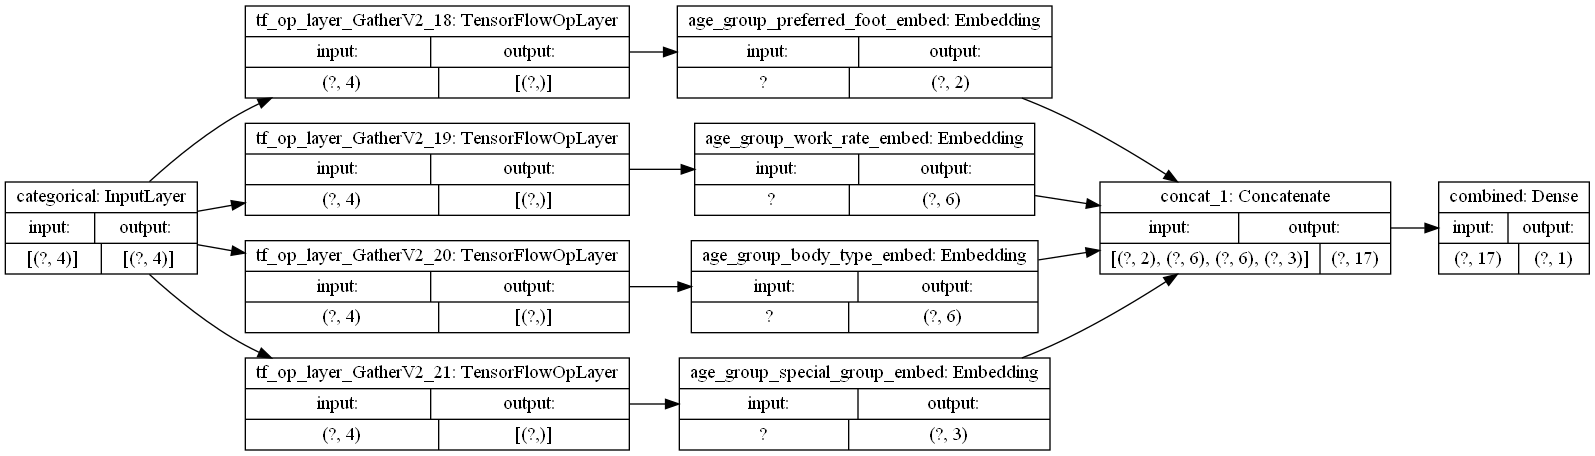

In [160]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

## <b>3 Layer ANN</b>

In [161]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names]
X_test_crossed = X_test[cross_col_df_names]

# save categorical features
X_train_cat = X_train[categorical_headers_ints] 
X_test_cat = X_test[categorical_headers_ints] 

# and save off the numeric features
X_train_num =  X_train[numeric_headers]
X_test_num = X_test[numeric_headers]


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

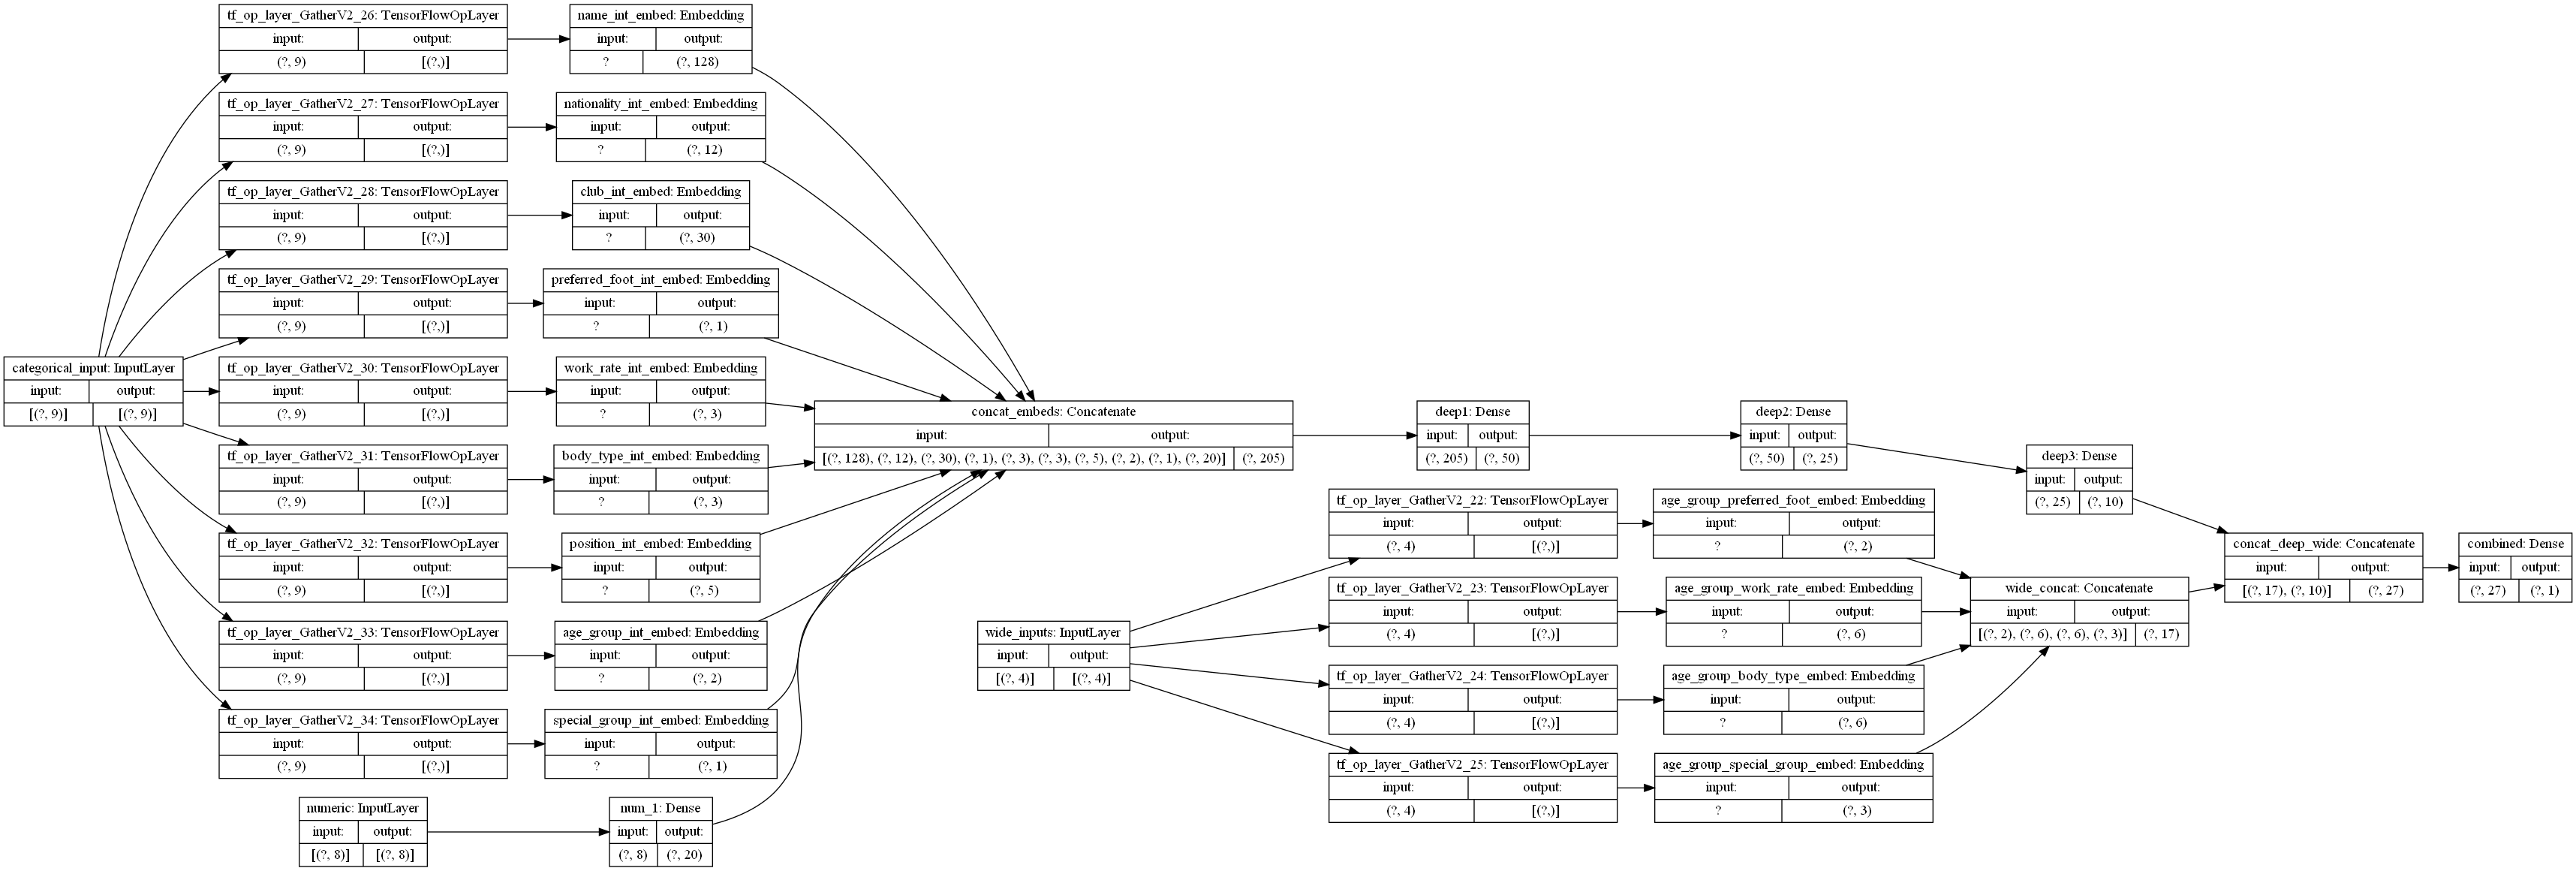

In [162]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
# model.summary()

In [163]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
440/440 [==============================] - 1s 1ms/step - loss: 2.2670 - accuracy: 0.2489 - val_loss: 2.1943 - val_accuracy: 0.2547
Epoch 2/15
440/440 [==============================] - 0s 1ms/step - loss: 2.1087 - accuracy: 0.2547 - val_loss: 2.0140 - val_accuracy: 0.2547
Epoch 3/15
440/440 [==============================] - 1s 1ms/step - loss: 1.9086 - accuracy: 0.2547 - val_loss: 1.8118 - val_accuracy: 0.2547
Epoch 4/15
440/440 [==============================] - 1s 1ms/step - loss: 1.7414 - accuracy: 0.2547 - val_loss: 1.6845 - val_accuracy: 0.2547
Epoch 5/15
440/440 [==============================] - 1s 1ms/step - loss: 1.6464 - accuracy: 0.2547 - val_loss: 1.6166 - val_accuracy: 0.2547
Epoch 6/15
440/440 [==============================] - 1s 1ms/step - loss: 1.5955 - accuracy: 0.2547 - val_loss: 1.5789 - val_accuracy: 0.2547
Epoch 7/15
440/440 [==============================] - 1s 1ms/step - loss: 1.5656 - accuracy: 0.2547 - val_loss: 1.5548 - val_accuracy: 0.2547
Epoch 

In [164]:
%%time

history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Wall time: 18.3 s


In [165]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[726 117   0   0   0]
 [ 38 858   0   0   0]
 [  0 905   0   0   0]
 [  3 828   0   0   0]
 [  8  35   0   0   0]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       843
           1       0.31      0.96      0.47       896
           2       0.00      0.00      0.00       905
           3       0.00      0.00      0.00       831
           4       0.00      0.00      0.00        43

    accuracy                           0.45      3518
   macro avg       0.25      0.36      0.27      3518
weighted avg       0.30      0.45      0.34      3518



Text(0.5, 0, 'epochs')

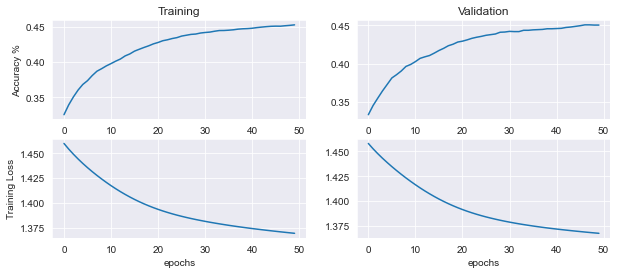

In [166]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## <b>5 Layer ANN</b>

## Modeling 2.2 
Refer to the saying in the notebook 10 GitHub:  Combining Crossed Linear Classifier and Deep Embeddings


5 layer
units = 50, 50, 25, 25, 10
- deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
- deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
- deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)

7 layer
units = 100, 50, 50, 25,  25, 10, 10,
- deep_branch = Dense(units=100,activation='relu', name='deep1')(deep_branch)
- deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
- deep_branch = Dense(units=50,activation='relu', name='deep3')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep5')(deep_branch)
- deep_branch = Dense(units=10,activation='relu', name='deep6')(deep_branch)
- deep_branch = Dense(units=10,activation='relu', name='deep7')(deep_branch)


Strategy
- M1 : use all cross columns 
- M2 : use the 1st three cross columns
- M3 : use last 3 cross column

Build Combining Crossed Linear Classifier and Deep Embeddings from notebook 10

In [167]:
# get crossed columns
X_train_crossed = X_train[cross_col_df_names]
X_test_crossed = X_test[cross_col_df_names]

# save categorical features
X_train_cat = X_train[categorical_headers_ints] 
X_test_cat = X_test[categorical_headers_ints] 

# and save off the numeric features
X_train_num =  X_train[numeric_headers]
X_test_num = X_test[numeric_headers]


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model5 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

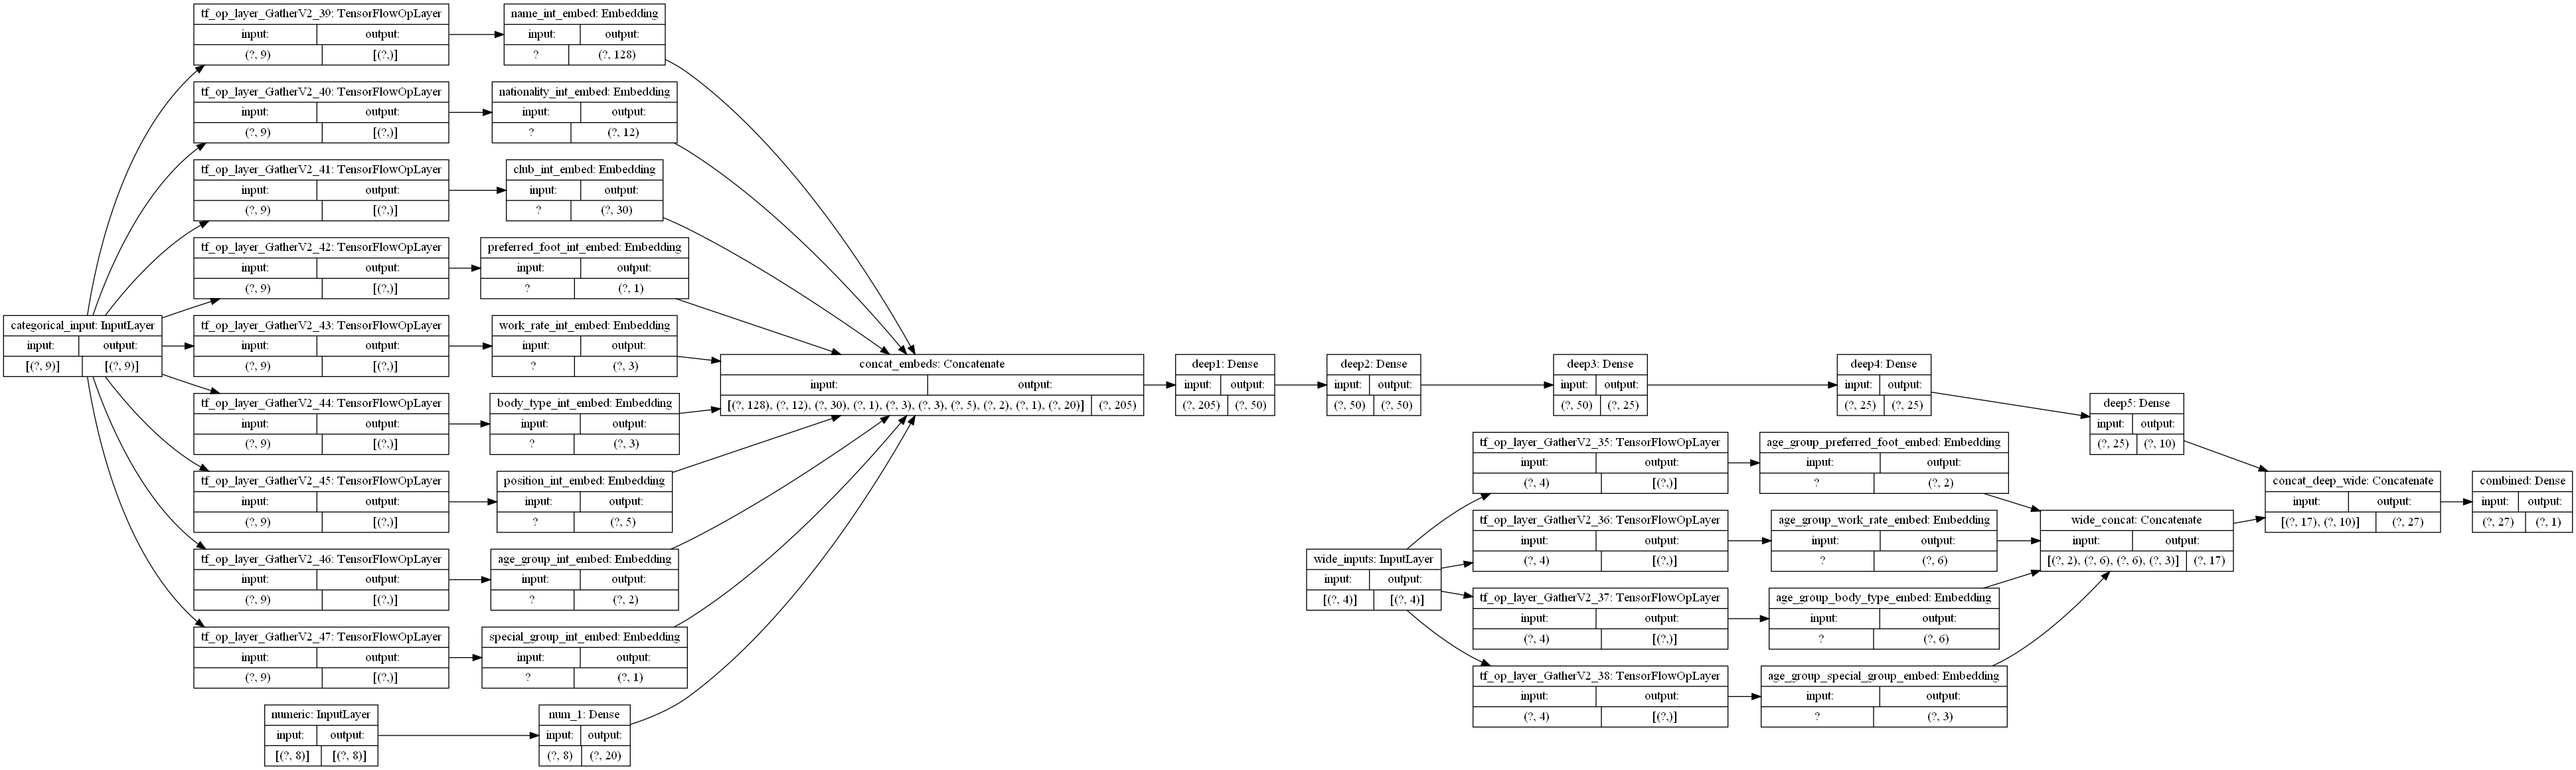

In [168]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model5, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
# model.summary()

In [169]:
%%time

model5.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model5.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
440/440 [==============================] - 1s 2ms/step - loss: 2.2428 - accuracy: 0.2515 - val_loss: 2.1513 - val_accuracy: 0.2547
Epoch 2/15
440/440 [==============================] - 0s 1ms/step - loss: 2.0206 - accuracy: 0.2547 - val_loss: 1.8809 - val_accuracy: 0.2547
Epoch 3/15
440/440 [==============================] - 0s 1ms/step - loss: 1.7527 - accuracy: 0.2547 - val_loss: 1.6586 - val_accuracy: 0.2547
Epoch 4/15
440/440 [==============================] - 0s 1ms/step - loss: 1.6066 - accuracy: 0.2547 - val_loss: 1.5708 - val_accuracy: 0.2547
Epoch 5/15
440/440 [==============================] - 0s 1ms/step - loss: 1.5444 - accuracy: 0.2547 - val_loss: 1.5216 - val_accuracy: 0.2547
Epoch 6/15
440/440 [==============================] - 0s 1ms/step - loss: 1.5029 - accuracy: 0.2547 - val_loss: 1.4877 - val_accuracy: 0.2547
Epoch 7/15
440/440 [==============================] - 0s 1ms/step - loss: 1.4752 - accuracy: 0.2590 - val_loss: 1.4647 - val_accuracy: 0.2695
Epoch 

In [170]:
%%time
history = model5.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Wall time: 20.3 s


In [171]:
yhat = np.round(model5.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[761  82   0   0   0]
 [ 46 850   0   0   0]
 [  0 905   0   0   0]
 [  1 830   0   0   0]
 [  8  35   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       843
           1       0.31      0.95      0.47       896
           2       0.00      0.00      0.00       905
           3       0.00      0.00      0.00       831
           4       0.00      0.00      0.00        43

    accuracy                           0.46      3518
   macro avg       0.25      0.37      0.28      3518
weighted avg       0.30      0.46      0.34      3518



Text(0.5, 0, 'epochs')

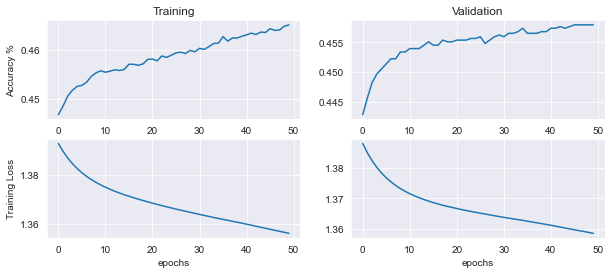

In [172]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## <b>7 Layer ANN Model</b>

## Modeling 2.2 
Refer to the saying in the notebook 10 GitHub:  Combining Crossed Linear Classifier and Deep Embeddings


5 layer
units = 50, 50, 25, 25, 10
- deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
- deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
- deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)

7 layer
units = 100, 50, 50, 25,  25, 10, 10,
- deep_branch = Dense(units=100,activation='relu', name='deep1')(deep_branch)
- deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
- deep_branch = Dense(units=50,activation='relu', name='deep3')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
- deep_branch = Dense(units=25,activation='relu', name='deep5')(deep_branch)
- deep_branch = Dense(units=10,activation='relu', name='deep6')(deep_branch)
- deep_branch = Dense(units=10,activation='relu', name='deep7')(deep_branch)

In [185]:
from tensorflow.keras.layers import Input, Embedding, Dense, concatenate
from tensorflow.keras.models import Model

# get crossed columns
X_train_crossed = X_train[cross_col_df_names]
X_test_crossed = X_test[cross_col_df_names]

# save categorical features
X_train_cat = X_train[categorical_headers_ints] 
X_test_cat = X_test[categorical_headers_ints] 

# and save off the numeric features
X_train_num =  X_train[numeric_headers]
X_test_num = X_test[numeric_headers]


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(X_train[col].max(),X_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=100,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=50,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep5')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep6')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep7')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model7 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

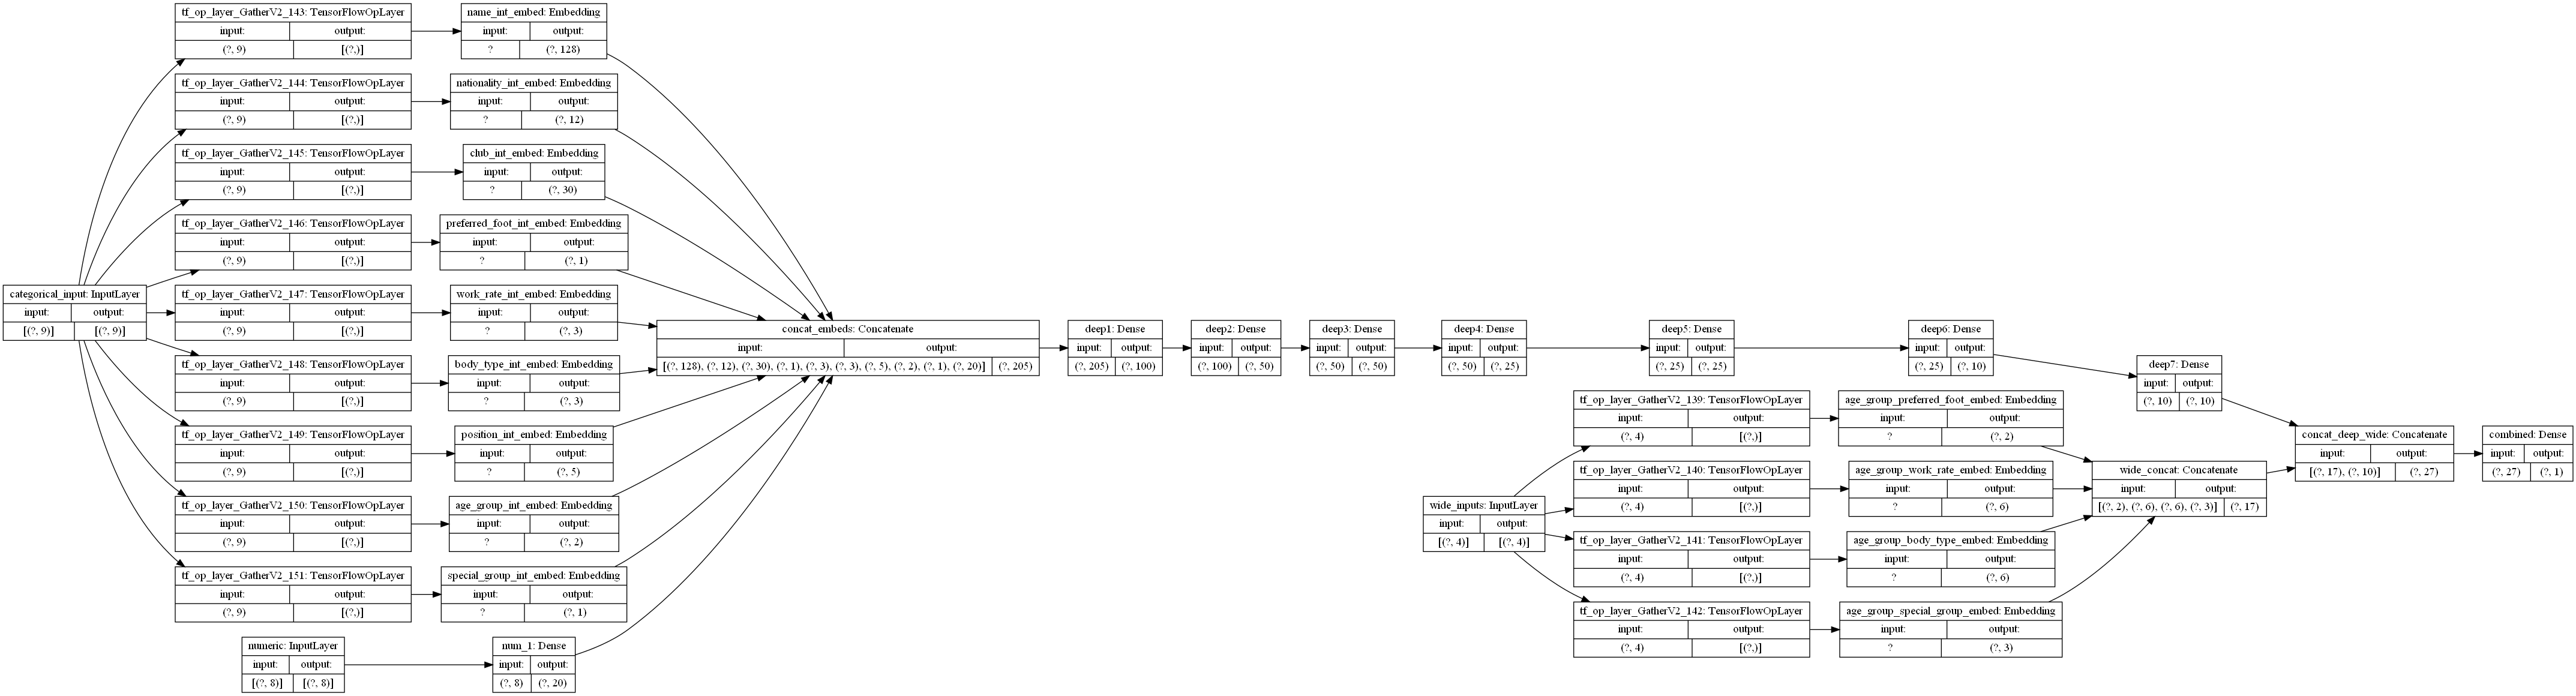

In [186]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model7, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
# model.summary()

In [187]:
%%time

model7.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model7.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
440/440 [==============================] - 1s 2ms/step - loss: 2.2858 - accuracy: 0.2867 - val_loss: 2.2521 - val_accuracy: 0.2609
Epoch 2/15
440/440 [==============================] - 1s 1ms/step - loss: 2.2185 - accuracy: 0.2563 - val_loss: 2.1873 - val_accuracy: 0.2553
Epoch 3/15
440/440 [==============================] - 1s 1ms/step - loss: 2.1450 - accuracy: 0.2548 - val_loss: 2.1007 - val_accuracy: 0.2547
Epoch 4/15
440/440 [==============================] - 1s 1ms/step - loss: 2.0314 - accuracy: 0.2548 - val_loss: 1.9467 - val_accuracy: 0.2547
Epoch 5/15
440/440 [==============================] - 1s 1ms/step - loss: 1.8198 - accuracy: 0.2547 - val_loss: 1.6968 - val_accuracy: 0.2547
Epoch 6/15
440/440 [==============================] - 1s 1ms/step - loss: 1.6164 - accuracy: 0.2547 - val_loss: 1.5619 - val_accuracy: 0.2553
Epoch 7/15
440/440 [==============================] - 1s 1ms/step - loss: 1.5279 - accuracy: 0.2639 - val_loss: 1.5022 - val_accuracy: 0.2885
Epoch 

In [188]:
%%time

history = model7.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=0, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Wall time: 24.7 s


In [189]:
yhat = np.round(model7.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[747  96   0   0   0]
 [ 46 850   0   0   0]
 [  0 905   0   0   0]
 [  3 828   0   0   0]
 [  8  35   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       843
           1       0.31      0.95      0.47       896
           2       0.00      0.00      0.00       905
           3       0.00      0.00      0.00       831
           4       0.00      0.00      0.00        43

    accuracy                           0.45      3518
   macro avg       0.25      0.37      0.28      3518
weighted avg       0.30      0.45      0.34      3518



Text(0.5, 0, 'epochs')

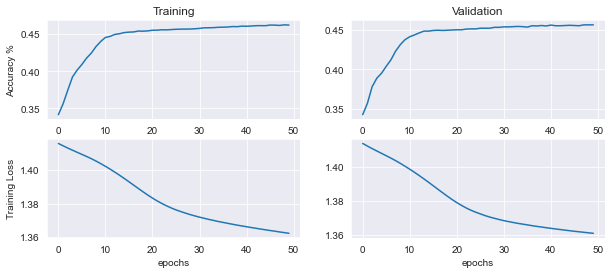

In [184]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## <b>BEST MODEL VERSUS PERCEPTRON</b>

**[1.0 points]** Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network).

## <b>Create Baseline 3 Layer Standard MLP</b>

In [215]:
%%time

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# split the data
from sklearn.model_selection import train_test_split
X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# Convert your labels to one-hot encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# CREATE A BASELINE MLP WITH THREE LAYERS

# Build a simple 3 layer MLP neural network
mlp = Sequential()
mlp.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(5, activation='softmax'))  # Assuming there are 5 classes

# Compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
mlp.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
y_pred_probs = mlp.predict(X_test)

Epoch 1/10
352/352 [==============================] - 1s 2ms/step - loss: 62.4779 - accuracy: 0.2605 - val_loss: 23.0909 - val_accuracy: 0.2551
Epoch 2/10
352/352 [==============================] - 0s 1ms/step - loss: 19.2976 - accuracy: 0.2960 - val_loss: 12.0515 - val_accuracy: 0.3947
Epoch 3/10
352/352 [==============================] - 0s 1ms/step - loss: 16.6440 - accuracy: 0.3321 - val_loss: 9.1487 - val_accuracy: 0.2920
Epoch 4/10
352/352 [==============================] - 0s 1ms/step - loss: 10.0242 - accuracy: 0.3694 - val_loss: 17.9362 - val_accuracy: 0.3492
Epoch 5/10
352/352 [==============================] - 0s 1ms/step - loss: 11.3724 - accuracy: 0.3932 - val_loss: 3.8260 - val_accuracy: 0.4796
Epoch 6/10
352/352 [==============================] - 0s 1ms/step - loss: 10.4102 - accuracy: 0.4260 - val_loss: 3.2672 - val_accuracy: 0.4874
Epoch 7/10
352/352 [==============================] - 0s 1ms/step - loss: 9.2878 - accuracy: 0.4300 - val_loss: 8.4678 - val_accuracy: 0.50

In [217]:
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[563 278   0   2   0]
 [ 67 607   2 220   0]
 [  1  16 823  65   0]
 [  3 127 218 483   0]
 [  8  16   6  13   0]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       843
           1       0.58      0.68      0.63       896
           2       0.78      0.91      0.84       905
           3       0.62      0.58      0.60       831
           4       0.00      0.00      0.00        43

    accuracy                           0.70      3518
   macro avg       0.57      0.57      0.56      3518
weighted avg       0.71      0.70      0.70      3518



## Standard 3 Layer MLP Confusion Matrix

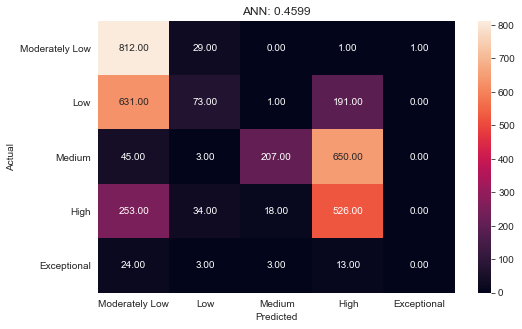

In [218]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt

yhat = np.argmax(mlp.predict(X_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
        
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  
            fmt = '.2f', 
            xticklabels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'], 
            yticklabels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f"ANN: {acc:.4f}")
plt.show()

### Comparison between our MLP and our 5 Layer ANN
We chose to compare the performance of our 3 layer MLP with our 5 layer ANN since the 5 layer ANN had the best performance out of our the different ANN networks as seen by our confusion matrices. 

**5 Layer ANN**   
  
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       843
           1       0.31      0.95      0.47       896
           2       0.00      0.00      0.00       905
           3       0.00      0.00      0.00       831
           4       0.00      0.00      0.00        43

    accuracy                           0.46      3518

**3 Layer MLP**
             
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       843
           1       0.58      0.68      0.63       896
           2       0.78      0.91      0.84       905
           3       0.62      0.58      0.60       831
           4       0.00      0.00      0.00        43

    accuracy                           0.70      3518

The precision, recall, and f1-score for our 5 layer ANN are all higher than the 3 layer MLP. As previously mentioned, we chose to use F1-score as our model performance indicator. F1-score combines precision and recall. Additionally, since we are dealing with imbalanced data with our response feature, F1-score is the best indicator of performance. The 3 layer MLP has higher F1-score for classes 1-4. Conversely, the 5 layer ANN model has a higher F1-score when predicting class 0. The 5 layer ANN seems to perform better for class 0 but lacks predictability for classes 2-4. Overall, we must examine the data and models to determine which model best fits our use case.

## <b>Standard MLP using StratifiedKFold (10 Fold) and Cross-Validation and F1-Scoring Metric</b>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming X contains your independent variables and y contains the target variable
X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()

# Convert your labels to one-hot encoding:
y_one_hot = to_categorical(y)

# Initialize StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

"""
# Initialize your deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming there are 5 classes
"""

# Compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Initialize a list to store F1 scores for each fold
f1_scores = []

# Iterate through the folds
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_one_hot[train_index], y_one_hot[test_index]

    # Train your DEEP LEARNING MODEL on the training data
    mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Predict on the test data
    y_pred_probs = model.predict(X_test)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate F1 score and append to the list
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')  # Change 'weighted' based on your multiclass setup
    f1_scores.append(f1)

# Calculate the mean F1 score across all folds
mean_f1_score = np.mean(f1_scores)

# Print the mean F1 score
print(f"Mean F1 Score: {mean_f1_score}")


### <a href="#detailed_grading_rubric">Lab5 Detailed Grading Rubric</a>

### <a href="#TOC">TOP</a>

## <a id="multivariate_data_analysis">3 - Exceptional Work</a> 
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Exceptional Work(<b>1.0 points total</b>)</h3>
    <ul>
        <li><b>(0.4)</b> The overall quality of the report as a coherent, useful, complete and polished product will be reflected here. Did you support your reasons for creating cross categories? Did you include plots and provide interpretation? Did you justify your choice of metrics?</li>
        <li><b>(0.6) Additional analysis</b></li>
        <li><b>5000 level student:</b> You have free reign to provide additional analyses and visualizations appropriate to your data.  Implement additional optimization models or statistical analysis.</li>
        <li><b>(7000 level students</b>):
        <li>Capture the embedding weights from the deep network and <b>(if needed)</b> perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data. </li>
        <li>Use <b>statistical methods</b> to compare the performance of different models.  For classification tasks, you might compare using the receiver operating characteristic and area under the curve. For regression tasks, you might use use Bland-Altman plots and residual variance calculations.</li>
    </ul>
</div>

## <b>Overall ROC-AUC Data Visualization</b>

Epoch 1/10
352/352 [==============================] - 1s 1ms/step - loss: 7.7538 - accuracy: 0.2645 - val_loss: 1.5559 - val_accuracy: 0.3155
Epoch 2/10
352/352 [==============================] - 0s 1ms/step - loss: 1.5243 - accuracy: 0.3094 - val_loss: 1.3965 - val_accuracy: 0.3449
Epoch 3/10
352/352 [==============================] - 0s 1ms/step - loss: 1.4297 - accuracy: 0.3550 - val_loss: 1.3236 - val_accuracy: 0.3396
Epoch 4/10
352/352 [==============================] - 0s 1ms/step - loss: 1.3226 - accuracy: 0.4090 - val_loss: 1.1641 - val_accuracy: 0.5034
Epoch 5/10
352/352 [==============================] - 0s 1ms/step - loss: 1.2491 - accuracy: 0.4400 - val_loss: 1.2422 - val_accuracy: 0.4416
Epoch 6/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1638 - accuracy: 0.4948 - val_loss: 1.1562 - val_accuracy: 0.4721
Epoch 7/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1255 - accuracy: 0.5102 - val_loss: 1.2802 - val_accuracy: 0.4185
Epoch 

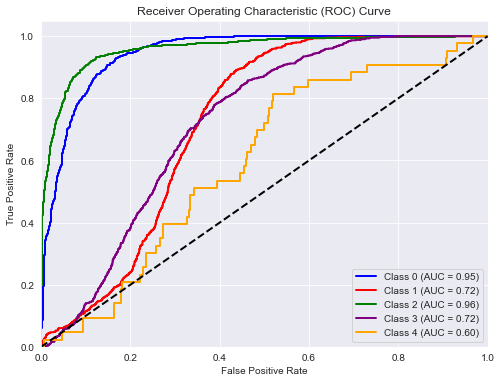

In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# split the data
from sklearn.model_selection import train_test_split
X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# Convert your labels to one-hot encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming there are 5 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming there are 5 classes
    fpr[i], tpr[i], _ = roc_curve((y_test_one_hot[:, i] == 1).astype(int), y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


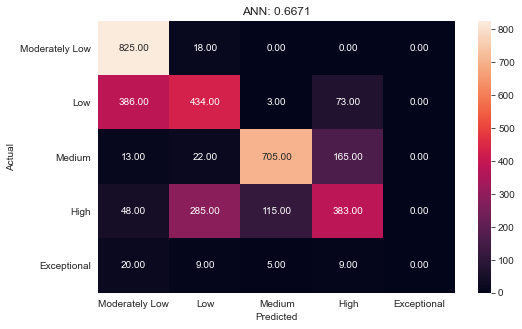

In [205]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt

yhat = np.argmax(model.predict(X_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
        
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  
            fmt = '.2f', 
            xticklabels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'], 
            yticklabels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f"ANN: {acc:.4f}")
plt.show()

## Observation
- Based on the metrics,
  - Class 0 has the highest AUC value (0.92) whereas Class 4 has the lowest AUC value (0.62)
  - AUC values closer to 1.0 suggest better discrimination ability.
  
- Mapping of the class indices (labels):
  - Class 0: Low
  - Class 1: High
  - Class 2: Exceptional
  - Class 3: Medium
  - Class 4: Moderately Low

## Observation

- It is best to compare between the following
  1. ROC-AUC on the training set,
  2. ROC-AUC on the test set
  
  
## See the statistical data analysis below

## <b>(1) ROC-AUC on the training set</b>

Epoch 1/10
352/352 [==============================] - 1s 3ms/step - loss: 9.4504 - accuracy: 0.2584 - val_loss: 2.4666 - val_accuracy: 0.2469
Epoch 2/10
352/352 [==============================] - 0s 811us/step - loss: 1.8436 - accuracy: 0.2842 - val_loss: 1.4565 - val_accuracy: 0.3435
Epoch 3/10
352/352 [==============================] - 0s 814us/step - loss: 1.6397 - accuracy: 0.3165 - val_loss: 1.3253 - val_accuracy: 0.4444
Epoch 4/10
352/352 [==============================] - 0s 798us/step - loss: 1.4484 - accuracy: 0.3810 - val_loss: 1.4805 - val_accuracy: 0.3560
Epoch 5/10
352/352 [==============================] - 0s 760us/step - loss: 1.3338 - accuracy: 0.4357 - val_loss: 1.2855 - val_accuracy: 0.4121
Epoch 6/10
352/352 [==============================] - 0s 764us/step - loss: 1.2036 - accuracy: 0.4847 - val_loss: 1.1128 - val_accuracy: 0.4959
Epoch 7/10
352/352 [==============================] - 0s 780us/step - loss: 1.0862 - accuracy: 0.5377 - val_loss: 0.9961 - val_accuracy: 0

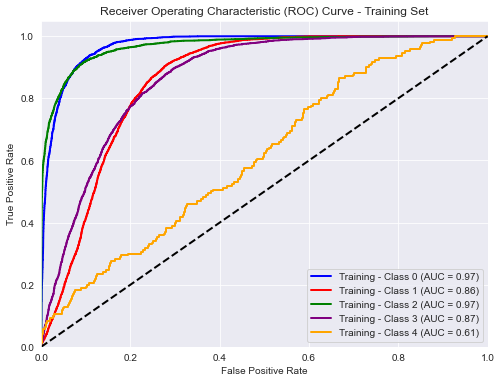

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# split the data
from sklearn.model_selection import train_test_split
X = df.drop('value(£)_group', axis=1).to_numpy()
y = df['value(£)_group'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2, stratify = y, random_state=1)

# Convert your labels to one-hot encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


# Build a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming there are 5 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# (1) ROC-AUC on the training set

# Predict probabilities on the training set
y_train_pred_probs = model.predict(X_train)

# Compute ROC curve and ROC area for each class on the training set
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
for i in range(5):  # Assuming there are 5 classes
    fpr_train[i], tpr_train[i], _ = roc_curve((y_train_one_hot[:, i] == 1).astype(int), y_train_pred_probs[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curves for the training set
plt.figure(figsize=(8, 6))
for i, color in zip(range(5), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Training - Class {i} (AUC = {roc_auc_train[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Set')
plt.legend(loc='lower right')
plt.show()

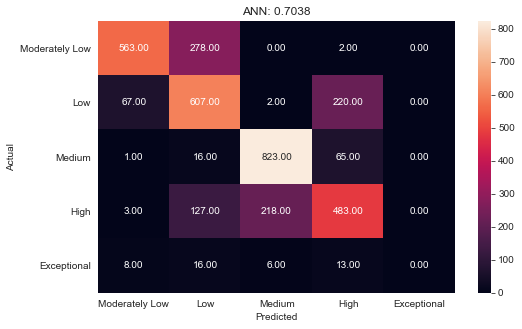

In [208]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt

yhat = np.argmax(model.predict(X_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
        
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  
            fmt = '.2f', 
            xticklabels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'], 
            yticklabels = ['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f"ANN: {acc:.4f}")
plt.show()

## Observation
- Class 0 and Class 2 are giving a good performance whereas Class 1, Class 3 are performing very well on the training data.
- But Class 4 not performing well on the test data.

## <b>(2) ROC-AUC on the test set</b>

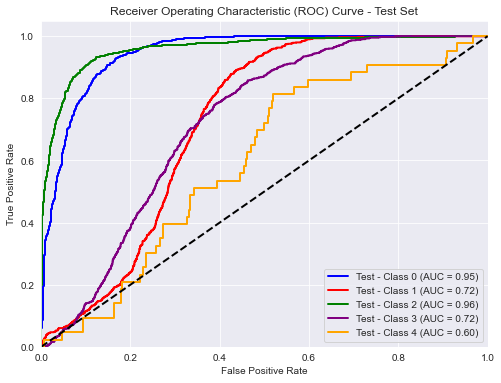

In [213]:
# Compute ROC curve and ROC area for each class on the test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(5):  # Assuming there are 5 classes
    fpr_test[i], tpr_test[i], _ = roc_curve((y_test_one_hot[:, i] == 1).astype(int), y_pred_probs[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curves for the test set
plt.figure(figsize=(8, 6))
for i, color in zip(range(5), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Test - Class {i} (AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

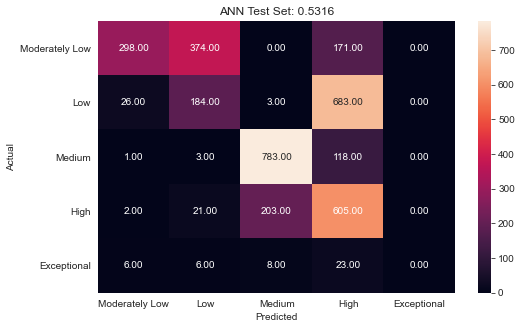

In [212]:
# Confusion Matrix for the test set
yhat_test = np.argmax(y_pred_probs, axis=1)
acc_test = mt.accuracy_score(y_test, yhat_test)

# Plotting the heatmap using confusion matrix
cm_test = confusion_matrix(y_test, yhat_test)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_test, annot=True,
            fmt='.2f',
            xticklabels=['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'],
            yticklabels=['Moderately Low', 'Low', 'Medium', 'High', 'Exceptional'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f"ANN Test Set: {acc_test:.4f}")
plt.show()

## Observation
- Class 0 and Class 2 are giving a good performance whereas Class 1, Class 3, and Class 4 are not performing well on the test data.

### <a href="#detailed_grading_rubric">Lab5 Detailed Grading Rubric</a>

### <a href="#TOC">TOP</a>

## <a id="conclusion_and_key_takeaways">5 - Conclusion and Recommendations</a>

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Conclusion and Recommendations</h3>
    <ul>
        <li>Conclude with the key insights/observations</li>
    </ul>
</div>

## Conclusion
- Awesome deep learning project. As a team, we got a chance to work on a TensorFlow-Keras Wide and Deep project.
- We strayed away from one-hot encoding and used the LabelEncoder for categorical variables.
- We also got a chance to get hands experience using ROC/AUC tool.   
- I got familiar working with imbalanced datasets, and knowing what tools that are available to use when investigating and data analysis.
  - Here we used StratifiedKfold, Cross Validation, and F1-score metrics to use when doing data analysis on imbalanced datasets.
- I love working with deep learning and neural networks.   It is pretty cool/awesome versus traditional machine learning.
- As a team, I am very impressed with TensorFlow, and Deep Learning and various ways you can use to solve complex problems.
- Don't be scared to get your hands dirty and get involved early in the process when working on projects.



### <a href="#detailed_grading_rubric">Lab5 Detailed Grading Rubric</a>

### <a href="#TOC">TOP</a>